# Project Outline: Time Series Analysis
This notebook is the time series analysis portion of the project "To Everything There is a Season : Using Weather Data and Demographic Information in the Predictive Modeling of Crimes in Dallas, Texas" by Ashley Steele.

[1. Importing Libraries and Setting Preferences](#1.-Importing-Libraries-and-Setting-Preferences)
- [1.1: Importing Libraries and Setting Preferences](#1.1:-Importing-Libraries-and-Setting-Preferences)
- [1.2:  Taking a Closer Look at Data Distribution and Correlations](#1.2:-Taking-a-Closer-Look-at-Data-Distribution-and-Correlations)
- [1.3: Using Linear Regression and Ordinary Least Squares(OLS) to Validate Our Features](#1.3:-Using-Linear-Regression-and-Ordinary-Least-Squares(OLS)-to-Validate-Our-Features)

[2. Model Dataframes Set-Up](#2.-Model-Dataframes-Set-Up)
- [2.1: Date vs. Crime Count](#2.1:-Date-vs.-Crime-Count)
- [2.2: Date vs. Temperature](#2.2:-Date-vs.-Temperature)

[3. Time Series Decomposition](#3.-Time-Series-Decomposition)
- [3.1: Decomposing Our Date vs. Crime Count Data](#3.1:-Decomposing-Our-Date-vs.-Crime-Count-Data)
- [3.2: Decomposing Our Date vs. Temperature Data](#3.2:-Decomposing-Our-Date-vs.-Temperature-Data)

[4. Modeling Our Data, Oh My!](#4.-Modeling-Our-Data,-Oh-My!)
- [4.1: Importing 2019 Data and Creating New Sub-data Frames](#4.1:-Importing-2019-Data-and-Creating-New-Sub-data-Frames)
- [4.2: Modeling Our Daily Crime Count Data and Forecasting](#4.2:-Modeling-Our-Daily-Crime-Count-Data-and-Forecasting)
- [4.3: Modeling Our Daily Temperature Data and Forecasting](#4.3:-Modeling-Our-Daily-Temperature-Data-and-Forecasting)
- [4.4: Comparing Our Models and Actual Data](#4.4:-Comparing-Our-Models-and-Actual-Data)

[5. Final Thoughts/Reflection](#5.-Final-Thoughts/Reflection)


## 1. Data Organization and Explortation
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

### 1.1: Importing Libraries and Setting Preferences
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

In [367]:
# Importing all important libraries here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [368]:
# Setting notebook preferences
pd.set_option('precision', 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set(style = 'whitegrid', font_scale = 1.25)

For this analysis we are going to use our final dataset as it has all of the information on weather and temperature that we need.

In [369]:
# Importing our final merged dataset to use for modeling
df = pd.read_csv('complete.csv')

In [370]:
df.head()

Unnamed: 0   date_only  month       mnth_yr day1_of_the_week  \
0           0  2015-01-01      1  January-2015              Thu   
1           1  2015-01-01      1  January-2015              Thu   
2           2  2015-01-01      1  January-2015              Thu   
3           3  2015-01-01      1  January-2015              Thu   
4           4  2015-01-01      1  January-2015              Thu   

  time_of_occurrence  day_of_the_year  temp_in_F  humidity  percip_inches  \
0              17:00                1      34.35     89.47           0.03   
1              00:20                1      34.35     89.47           0.03   
2              08:00                1      34.35     89.47           0.03   
3              02:00                1      34.35     89.47           0.03   
4              13:00                1      34.35     89.47           0.03   

                911_call_type  \
0        11V - BURG MOTOR VEH   
1      31 - CRIMINAL MISCHIEF   
2  58 - ROUTINE INVESTIGATION   
3                  40 - OTHER   
4      31 - CRIMINAL MISCHIEF   

                                    type_of_incident       division  sector  \
0                                                BMV  SOUTH CENTRAL   730.0   
1            CRIM MISCHIEF > OR EQUAL $50 BUT < $500  SOUTH CENTRAL   710.0   
2  FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...        CENTRAL   150.0   
3                             ASSAULT -VERBAL THREAT      NORTHWEST   520.0   
4            CRIM MISCHIEF > OR EQUAL $50 BUT < $500      NORTHEAST   220.0   

  council_district victim_type         victim_race        victim_ethnicity  \
0               D8  Individual               White  Non-Hispanic or Latino   
1               D4  Individual               Black  Non-Hispanic or Latino   
2               D2  Individual               Black  Non-Hispanic or Latino   
3               D6  Individual  Hispanic or Latino      Hispanic or Latino   
4               D9  Individual               Black  Non-Hispanic or Latino   

  victim_gender  victim_age responding_officer_#1__badge_no  \
0          Male          50                            8173   
1          Male          51                            8133   
2        Female          64                            7341   
3          Male          36                           10767   
4        Female          70                            9654   

  responding_officer_#1__name responding_officer_#2_badge_no  \
0      JONES,REGINALD,LADUNNE                            NaN   
1            ADAMS,CORY,JAMES                            NaN   
2             FREEMAN,DIANA,J                            NaN   
3                  HOVIS,ALAN                           5455   
4          BANDAS,WAYI,ALIBEY                            NaN   

  responding_officer_#2__name  x_coordinate  y_cordinate  zip_code  total_pop  \
0                         NaN      2.51e+06     6.93e+06     75241    50872.0   
1                         NaN      2.49e+06     6.95e+06     75216    76015.0   
2                         NaN      2.49e+06     6.97e+06     75215    22570.0   
3       AKON,FREDRICK,CHARLES      2.47e+06     7.00e+06     75220    69009.0   
4                         NaN      2.53e+06     6.99e+06     75228   106467.0   

      male  %_male   female  %_female  median_age  18_&_over  21_&_over  \
0  23984.0    45.6  26888.0      54.4        34.0       71.8       68.1   
1  35922.0    46.6  40093.0      53.4        35.2       71.9       67.9   
2  11298.0    48.8  11272.0      51.2        38.8       79.2       76.1   
3  38379.0    53.0  30630.0      47.0        33.7       74.9       71.2   
4  52189.0    49.1  54278.0      50.9        31.8       70.2       66.2   

   62_&_over  65_&_over  %_white  %_black  %_native  %_asian  %_hispanic  \
0       14.1       12.0     21.1     74.7      11.5      0.0        20.3   
1       16.3       13.4     29.9     65.0       3.1      0.1        32.8   
2       16.2       12.8     22.7     73.6       3.1      0.7    

In [371]:
# Looking for duplicates, just in case
df['Unnamed: 0'].nunique()

254724

In [372]:
len(df)

254724

In [373]:
# Getting rid of our unnecessary columns
df.drop(columns = 'Unnamed: 0', inplace = True)

Now that we have our data loaded let's determine the main goal of our time series analysis and refine our data for modeling!

**The main research question/hypothesis for our time series analysis is:** how, if at all, does daily temperature affect daily crime reports in Dallas, Texas?

Since our main focus is on time-based features it is super important thaat we have all of our data set up correctly. Let's start working on this below!

In [374]:
df['date_only'] = pd.to_datetime(df['date_only'])

In [375]:
# Creating new columns for the datetime versions of these
df['mnth'] = df['date_only'].dt.month
df['day_of_year_number'] = df['date_only'].dt.dayofyear

In [376]:
# Sanity check: does everything look like we expect it to?
df.head()

date_only  month       mnth_yr day1_of_the_week time_of_occurrence  \
0 2015-01-01      1  January-2015              Thu              17:00   
1 2015-01-01      1  January-2015              Thu              00:20   
2 2015-01-01      1  January-2015              Thu              08:00   
3 2015-01-01      1  January-2015              Thu              02:00   
4 2015-01-01      1  January-2015              Thu              13:00   

   day_of_the_year  temp_in_F  humidity  percip_inches  \
0                1      34.35     89.47           0.03   
1                1      34.35     89.47           0.03   
2                1      34.35     89.47           0.03   
3                1      34.35     89.47           0.03   
4                1      34.35     89.47           0.03   

                911_call_type  \
0        11V - BURG MOTOR VEH   
1      31 - CRIMINAL MISCHIEF   
2  58 - ROUTINE INVESTIGATION   
3                  40 - OTHER   
4      31 - CRIMINAL MISCHIEF   

                                    type_of_incident       division  sector  \
0                                                BMV  SOUTH CENTRAL   730.0   
1            CRIM MISCHIEF > OR EQUAL $50 BUT < $500  SOUTH CENTRAL   710.0   
2  FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...        CENTRAL   150.0   
3                             ASSAULT -VERBAL THREAT      NORTHWEST   520.0   
4            CRIM MISCHIEF > OR EQUAL $50 BUT < $500      NORTHEAST   220.0   

  council_district victim_type         victim_race        victim_ethnicity  \
0               D8  Individual               White  Non-Hispanic or Latino   
1               D4  Individual               Black  Non-Hispanic or Latino   
2               D2  Individual               Black  Non-Hispanic or Latino   
3               D6  Individual  Hispanic or Latino      Hispanic or Latino   
4               D9  Individual               Black  Non-Hispanic or Latino   

  victim_gender  victim_age responding_officer_#1__badge_no  \
0          Male          50                            8173   
1          Male          51                            8133   
2        Female          64                            7341   
3          Male          36                           10767   
4        Female          70                            9654   

  responding_officer_#1__name responding_officer_#2_badge_no  \
0      JONES,REGINALD,LADUNNE                            NaN   
1            ADAMS,CORY,JAMES                            NaN   
2             FREEMAN,DIANA,J                            NaN   
3                  HOVIS,ALAN                           5455   
4          BANDAS,WAYI,ALIBEY                            NaN   

  responding_officer_#2__name  x_coordinate  y_cordinate  zip_code  total_pop  \
0                         NaN      2.51e+06     6.93e+06     75241    50872.0   
1                         NaN      2.49e+06     6.95e+06     75216    76015.0   
2                         NaN      2.49e+06     6.97e+06     75215    22570.0   
3       AKON,FREDRICK,CHARLES      2.47e+06     7.00e+06     75220    69009.0   
4                         NaN      2.53e+06     6.99e+06     75228   106467.0   

      male  %_male   female  %_female  median_age  18_&_over  21_&_over  \
0  23984.0    45.6  26888.0      54.4        34.0       71.8       68.1   
1  35922.0    46.6  40093.0      53.4        35.2       71.9       67.9   
2  11298.0    48.8  11272.0      51.2        38.8       79.2       76.1   
3  38379.0    53.0  30630.0      47.0        33.7       74.9       71.2   
4  52189.0    49.1  54278.0      50.9        31.8       70.2       66.2   

   62_&_over  65_&_over  %_white  %_black  %_native  %_asian  %_hispanic  \
0       14.1       12.0     21.1     74.7      11.5      0.0        20.3   
1       16.3       13.4     29.9     65.0       3.1      0.1        32.8   
2       16.2       12.8     22.7     73.6       3.1      0.7        17.0   
3       12.0        9.1     75.7      7.3      16.0      3.0      

In [377]:
# Getting rid of our old columns
df.drop(columns = ['month', 'day_of_the_year'], inplace = True)

In [378]:
# Just checking our overall info for the df again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254724 entries, 0 to 254723
Data columns (total 50 columns):
date_only                          254724 non-null datetime64[ns]
mnth_yr                            254724 non-null object
day1_of_the_week                   254724 non-null object
time_of_occurrence                 254724 non-null object
temp_in_F                          254724 non-null float64
humidity                           254724 non-null float64
percip_inches                      254724 non-null float64
911_call_type                      254724 non-null object
type_of_incident                   254724 non-null object
division                           254713 non-null object
sector                             254713 non-null float64
council_district                   254578 non-null object
victim_type                        254724 non-null object
victim_race                        254724 non-null object
victim_ethnicity                   254724 non-null object
victim_

### 1.2:  Taking a Closer Look at Data Distribution and Correlations
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Before we can even begin to start thinking of modeling we have a few main issues to deal with, such as null values, distribution of specific features, and looking closely at how our features correlate (if at all) to our target variable. 

In [379]:
# Where my nulls at?
df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        169593
responding_officer_#2_badge_no     169593
council_district                      146
division                               11
sector                                 11
victim_race                             0
y_cordinate                             0
x_coordinate                            0
responding_officer_#1__name             0
responding_officer_#1__badge_no         0
victim_age                              0
victim_gender                           0
victim_ethnicity                        0
day_of_year_number                      0
victim_type                             0
mnth                                    0
type_of_incident                        0
911_call_type                           0
percip_inches                           0
humidity                                0
temp_in_F                               0
time_of_occurrence                      0
day1_of_the_week                        0
mnth_yr                           

In [380]:
# Dropping nulls so we can model
df.dropna(inplace = True)

In [381]:
# Taking a quick look to see how much the length of our data changed by dropping nulls.
len(df)

85066

In [382]:
# Dropping count features where we have a %
df.drop(columns = ['male', 'female', 'pop_over_16', 'zip_code.1'], inplace = True)

In [383]:
# Creating a daily count df to see if I can add it as a feature
daily_count = pd.DataFrame(df['date_only'].value_counts())

In [384]:
# What does our daily_count look like?
daily_count.sort_values(by = 'date_only', inplace = True)
daily_count.head(500)

date_only
2018-02-13          1
2018-02-12          3
2018-02-14          3
2018-02-06          4
2018-02-11         15
2018-02-05         18
2015-02-25         27
2017-01-26         27
2017-02-09         29
2015-02-23         30
2017-09-12         30
2018-01-31         31
2015-02-03         31
2018-02-20         32
2017-12-26         32
2017-11-08         32
2015-12-16         33
2018-01-16         33
2015-12-29         33
2018-01-02         33
2017-09-13         33
2018-04-10         33
2017-12-12         34
2017-02-22         34
2018-10-16         35
2016-05-05         35
2018-02-15         35
2015-04-21         35
2017-09-20         35
2018-08-21         36
2017-12-18         36
2017-12-14         36
2016-02-04         36
2017-09-26         37
2016-03-31         37
2015-01-07         37
2018-11-01         37
2018-03-14         37
2016-02-23         37
2018-04-03         38
2017-04-25         38
2015-04-08         38
2015-12-21         38
2017-05-23         38
2015-03-09         38
2018-05-15         38
2017-02-28         38
2015-01-05         38
2017-08-15         38
2015-03-10         38
2015-06-16         38
2018-02-27         39
2018-03-20         39
2017-09-23         39
2017-09-27         39
2016-01-19         39
2016-01-11         39
2018-06-28         39
2017-09-21         39
2015-03-13         39
2018-03-29         39
2015-05-19         39
2017-10-23         40
2017-12-25         40
2018-05-16         40
2015-12-10         40
2015-01-13         40
2017-10-18         40
2018-02-28         40
2017-12-13         40
2015-02-24         40
2017-12-27         40
2017-12-28         40
2016-03-07         40
2015-08-12         40
2017-10-26         40
2018-02-23         40
2015-02-10         40
2017-11-21         40
2015-05-21         40
2015-03-11         40
2018-03-28         41
2017-04-26         41
2017-03-22         41
2015-02-11         41
2017-09-18         41
2018-03-22         41
2017-08-04         41
2016-02-09         41
2017-02-14         41
2018-02-22         41
2018-06-13         41
2018-04-04         41
2018-02-21         41
2016-11-22         41
2016-01-25         41
2017-03-05         41
2016-02-10         41
2016-07-06         41
2016-01-06         41
2015-04-16         41
2017-09-07         41
2017-05-25         41
2017-05-02         41
2016-07-27         41
2016-01-27         41
2016-09-27         42
2016-03-21         42
2015-03-16         42
2016-08-22         42
2015-02-04         42
2017-12-06         42
2015-02-27         42
2015-02-17         42
2017-12-20         42
2016-02-11         42
2015-09-15         42
2016-01-16         42
2015-11-28         42
2015-11-30         42
2018-04-17         42
2016-03-20         42
2016-01-22         42
2017-11-29         42
2016-05-15         42
2018-01-23         42
2017-12-19         42
2016-11-15         42
2017-10-31         42
2018-04-16         42
2017-09-19         42
2016-03-30         42
2018-06-12         42
2018-04-08         42
2017-01-20         43
2016-10-11         43
2017-03-03         43
2017-11-20         43
2018-01-15         43
2017-03-08         43
2015-10-13         43
2016-04-17         43
2015-01-20         43
2017-02-23         43
2016-10-19         43
2018-01-04         43
2017-01-18         43
2015-04-14         43
2017-09-10         43
2015-01-06         43
2016-02-08         43
2015-02-18         43
2017-12-15         44
2016-02-16         44
2017-08-24         44
2018-04-02         44
2018-02-10         44
2016-05-12         44
2015-07-07         44
2018-05-10         44
2016-10-25         44
2016-10-06         44
2018-04-19         44
2015-01-21         44
2017-05-10         44
2015-03-05         44
2016-09-29         44
2015-06-10         44
2017-07-11         44
2017-04-06         44
2017-09-14         44
2017-11-09         44
2017-04-05         44
2018-08-14         44
2016-11-07         44
2017-07-12         44
2018-01-03         45
2017-12-05         45
2018-01-09         45
2015-03-04         45
2016-01-26         45
2015-04-

In [385]:
# Cleaning up of new df
daily_count.reset_index(inplace = True)
daily_count.rename(columns = {'index':'date_only', 'date_only':'daily_crime_count'}, inplace = True)
daily_count.sort_values(by = 'date_only', inplace = True)
daily_count.head()

date_only  daily_crime_count
1402 2015-01-01                 81
484  2015-01-02                 52
1128 2015-01-03                 67
248  2015-01-04                 47
47   2015-01-05                 38

In [386]:
# Combining dataframes
df = pd.merge(df, daily_count, how = 'left', on= 'date_only' )

In [387]:
df.head(100)

date_only       mnth_yr day1_of_the_week time_of_occurrence  temp_in_F  \
0  2015-01-01  January-2015              Thu              02:00      34.35   
1  2015-01-01  January-2015              Thu              00:40      34.35   
2  2015-01-01  January-2015              Thu              03:15      34.35   
3  2015-01-01  January-2015              Thu              02:43      34.35   
4  2015-01-01  January-2015              Thu              01:50      34.35   
5  2015-01-01  January-2015              Thu              22:30      34.35   
6  2015-01-01  January-2015              Thu              02:00      34.35   
7  2015-01-01  January-2015              Thu              02:30      34.35   
8  2015-01-01  January-2015              Thu              03:00      34.35   
9  2015-01-01  January-2015              Thu              03:00      34.35   
10 2015-01-01  January-2015              Thu              04:00      34.35   
11 2015-01-01  January-2015              Thu              02:11      34.35   
12 2015-01-01  January-2015              Thu              17:00      34.35   
13 2015-01-01  January-2015              Thu              00:00      34.35   
14 2015-01-01  January-2015              Thu              04:01      34.35   
15 2015-01-01  January-2015              Thu              05:00      34.35   
16 2015-01-01  January-2015              Thu              21:55      34.35   
17 2015-01-01  January-2015              Thu              00:15      34.35   
18 2015-01-01  January-2015              Thu              12:00      34.35   
19 2015-01-01  January-2015              Thu              00:00      34.35   
20 2015-01-01  January-2015              Thu              13:10      34.35   
21 2015-01-01  January-2015              Thu              12:00      34.35   
22 2015-01-01  January-2015              Thu              22:10      34.35   
23 2015-01-01  January-2015              Thu              17:30      34.35   
24 2015-01-01  January-2015              Thu              03:00      34.35   
25 2015-01-01  January-2015              Thu              17:30      34.35   
26 2015-01-01  January-2015              Thu              00:00      34.35   
27 2015-01-01  January-2015              Thu              14:18      34.35   
28 2015-01-01  January-2015              Thu              10:45      34.35   
29 2015-01-01  January-2015              Thu              00:51      34.35   
30 2015-01-01  January-2015              Thu              00:10      34.35   
31 2015-01-01  January-2015              Thu              14:20      34.35   
32 2015-01-01  January-2015              Thu              00:00      34.35   
33 2015-01-01  January-2015              Thu              03:12      34.35   
34 2015-01-01  January-2015              Thu              04:30      34.35   
35 2015-01-01  January-2015              Thu              17:00      34.35   
36 2015-01-01  January-2015              Thu              05:00      34.35   
37 2015-01-01  January-2015              Thu              19:00      34.35   
38 2015-01-01  January-2015              Thu              20:30      34.35   
39 2015-01-01  January-2015              Thu              00:08      34.35   
40 2015-01-01  January-2015              Thu              14:14      34.35   
41 2015-01-01  January-2015              Thu              19:00      34.35   
42 2015-01-01  January-2015              Thu              17:00      34.35   
43 2015-01-01  January-2015              Thu              04:00      34.35   
44 2015-01-01  January-2015              Thu              08:00      34.35   
45 2015-01-01  January-2015              Thu              00:40      34.35   
46 2015-01-01  January-2015              Thu              22:00      34.35   
47 2015-01-01  January-2015              Thu              05:00      34.35   
48 2015-01-01  January-2015              Thu              17:57      34.35   
49 2015-01-01  January-2015              Thu              05:20      34.35   
50 2015-01-01  January-201

Since we are doing this project as if we are working in an actual work situation where analyzing time series data is a daily part of our position, we are going to approach our modeling in that manner. In a real-life situation it is of the utmost importance to quickly see if **1.)** the data we have is actually worth something in regards to modeling, and **2.)** preform a quick and "dirty" linear regression using OLS to verify that our data is actually worth using. Let's get started with a corrleation matrix for our data!

In [388]:
# How does everything relate to each other?
corr = df.corr().abs()
corr

temp_in_F  humidity  percip_inches    sector  \
temp_in_F               1.00e+00  1.64e-01       5.55e-02  3.18e-03   
humidity                1.64e-01  1.00e+00       3.67e-01  5.64e-03   
percip_inches           5.55e-02  3.67e-01       1.00e+00  3.05e-03   
sector                  3.18e-03  5.64e-03       3.05e-03  1.00e+00   
victim_age              2.30e-03  8.69e-03       9.31e-04  3.79e-02   
x_coordinate            7.78e-03  7.54e-05       4.57e-03  4.41e-01   
y_cordinate             9.11e-03  1.63e-03       4.95e-03  2.03e-01   
zip_code                7.87e-03  1.41e-03       5.96e-03  2.70e-01   
total_pop               1.06e-03  3.13e-03       4.57e-03  1.17e-01   
%_male                  1.27e-02  1.48e-02       4.67e-03  2.76e-01   
%_female                1.36e-02  8.19e-03       9.41e-03  2.76e-01   
median_age              4.09e-03  5.66e-03       6.95e-03  2.58e-01   
18_&_over               5.54e-03  5.76e-03       3.60e-03  1.76e-01   
21_&_over               4.82e-03  3.07e-03       2.01e-03  1.80e-01   
62_&_over               1.39e-02  2.12e-02       6.31e-03  3.98e-01   
65_&_over               1.48e-02  2.16e-02       8.06e-03  4.10e-01   
%_white                 1.26e-02  6.22e-03       5.93e-03  3.56e-01   
%_black                 1.32e-02  6.33e-03       1.17e-02  3.52e-01   
%_native                1.44e-02  3.28e-02       1.35e-02  1.23e-02   
%_asian                 9.67e-03  3.29e-02       2.49e-02  2.20e-01   
%_hispanic              2.00e-03  1.60e-03       4.34e-03  7.69e-02   
%_pop_over_16           1.57e-02  1.31e-02       3.71e-03  7.78e-02   
%_employed              4.92e-03  1.88e-02       1.17e-02  3.90e-01   
%_unemployed            1.10e-02  7.40e-02       2.83e-02  2.30e-01   
mean_household_income   1.65e-02  5.99e-02       4.06e-02  3.29e-02   
%_families_poverty      8.63e-03  2.62e-02       2.34e-02  1.67e-01   
%_all_people_poverty    1.32e-02  6.90e-03       6.59e-04  1.23e-01   
year                    4.14e-03  1.50e-01       3.36e-02  7.06e-04   
mnth                    1.57e-01  3.10e-02       2.05e-02  9.22e-03   
day_of_year_number      1.56e-01  2.98e-02       2.15e-02  8.82e-03   
daily_crime_count       2.42e-01  2.39e-02       3.60e-04  9.85e-03   

                       victim_age  x_coordinate  y_cordinate  zip_code  \
temp_in_F                2.30e-03      7.78e-03     9.11e-03  7.87e-03   
humidity                 8.69e-03      7.54e-05     1.63e-03  1.41e-03   
percip_inches            9.31e-04      4.57e-03     4.95e-03  5.96e-03   
sector                   3.79e-02      4.41e-01     2.03e-01  2.70e-01   
victim_age               1.00e+00      1.74e-02     2.86e-02  1.28e-02   
x_coordinate             1.74e-02      1.00e+00     1.72e-02  1.86e-02   
y_cordinate              2.86e-02      1.72e-02     1.00e+00  3.97e-01   
zip_code                 1.28e-02      1.86e-02     3.97e-01  1.00e+00   
total_pop                1.99e-02      4.36e-01     1.20e-01  1.48e-01   
%_male                   3.70e-02      1.13e-01     2.49e-01  1.96e-01   
%_female                 3.63e-02      1.13e-01     2.52e-01  1.94e-01   
median_age               4.50e-02      2.08e-01     4.91e-01  2.85e-01   
18_&_over                3.20e-02      2.59e-01     4.08e-01  1.07e-03   
21_&_over                2.84e-02      2.25e-01     4.36e-01  1.47e-02   
62_&_over                6.07e-02      9.68e-02     3.48e-01  3.18e-01   
65_&_over                5.68e-02      8.82e-02     3.51e-01  3.59e-01   
%_white                  2.67e-02      2.77e-02     4.28e-01  1.84e-01   
%_black                  3.92e-02      1.35e-02     5.69e-01  4.50e-02   
%_native                 1.42e-02      4.82e-02     1.19e-01  2.12e-01   
%_asian                  4.76e-02      9.59e-02     7.30e-01  3.24e-01   
%_hispanic               6.85e-03      1.38e-01     2.92e-01  2.54e-01   
%_pop_over_16            3.06e-02      5.58e-02     1.35e-01  1.73e-01   
%_employed               5.83e-02      5.79e-02 

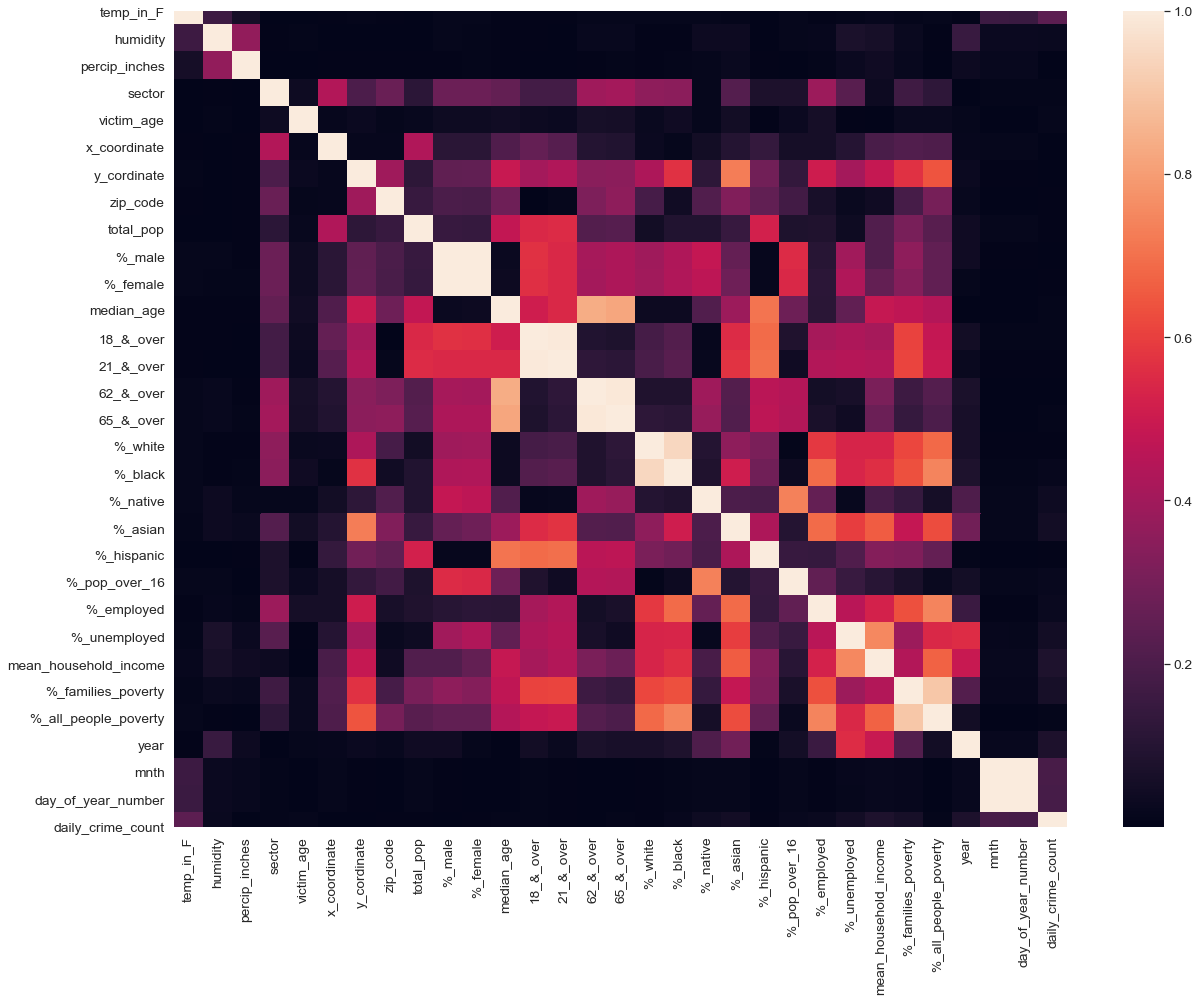

In [389]:
# What do our correlations look like visually?
plt.figure(figsize = (20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

AWESOME! Our two main features we hypothesized were important to each other, daily crime count and temperature, do show a correlation! Even though, in a "perfect situation", a 20% correlation between variables doesn't seem too impresive since we are using real-life data this is a great sign that our two features are actually connected! Since we've looked at our connection between the two let's quickly take a look at what each features looks like seperately.

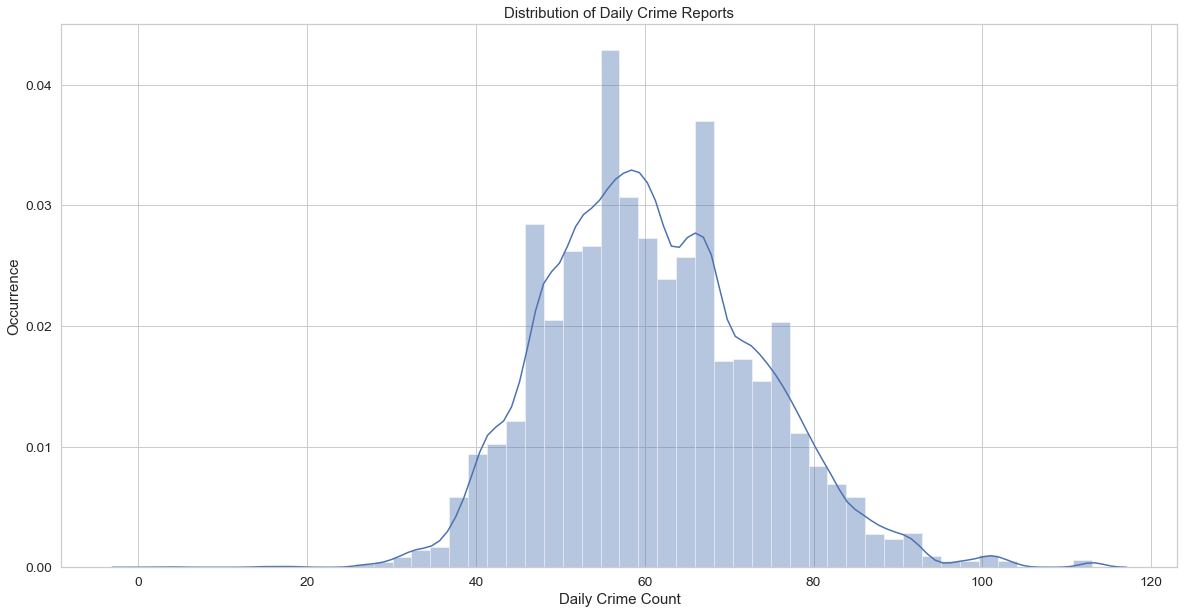

In [390]:
# What is the distribution of our daily crime counts?
plt.figure(figsize = (20,10))
sns.distplot(df['daily_crime_count'])
plt.title('Distribution of Daily Crime Reports')
plt.xlabel('Daily Crime Count')
plt.ylabel('Occurrence');

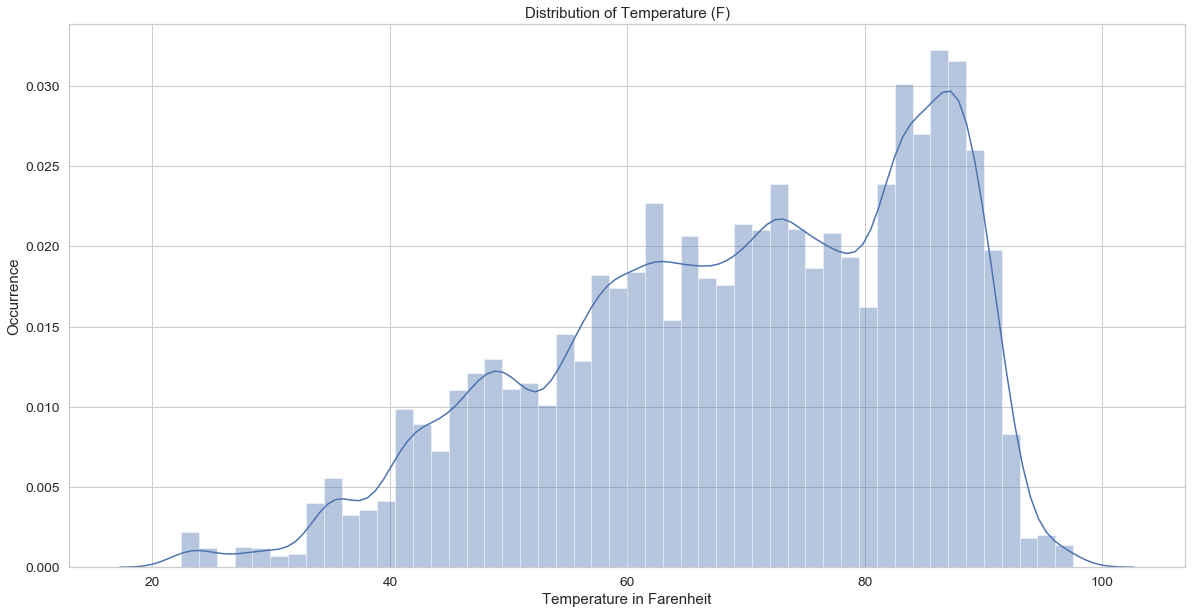

In [391]:
# What is the distribution of our temperature?
plt.figure(figsize = (20, 10))
sns.distplot(df['temp_in_F'])
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Occurrence');

NICE! Both of our chosen features have a pretty regular distribution and no crazy outliers which means we can move on to the next step of our analysis.

In addition to our two main features we are focusing on for our modeling there were also several other correlations that stood out, though not enough to reach our threshold for modeling. Let's go ahead and visualize these relationships below!

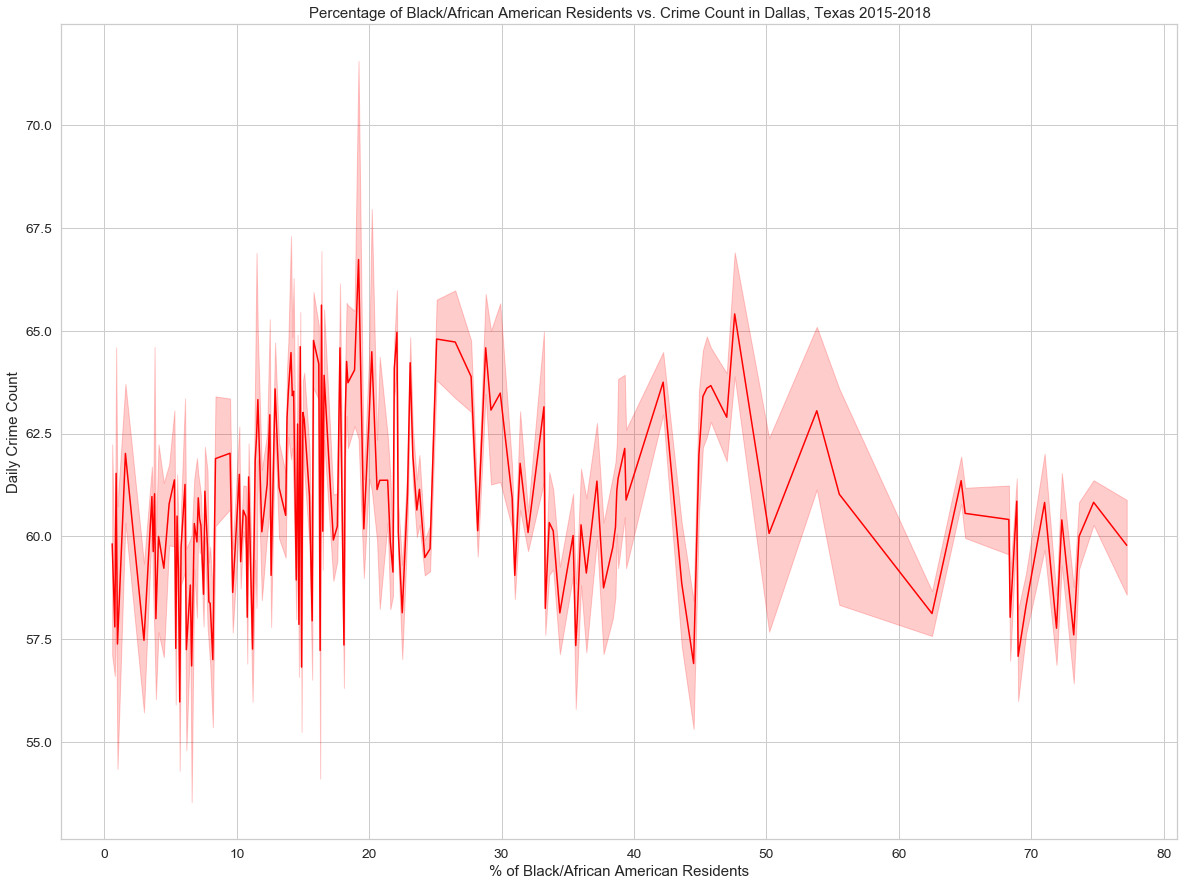

In [392]:
# What does the relationship between crime counts and % of Black/African American residents look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_black'], y = df['daily_crime_count'], data = df, color = 'red')
plt.title('Percentage of Black/African American Residents vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('% of Black/African American Residents')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**
There is a ton of activity going on around the 10- 30% area of populations, meaning that crime counts increase where the Black/African American population is between 10-30%. We can also see some interesting spikes and valleys throughout this data but nothing is consistant enough to warrant a higher correlation.

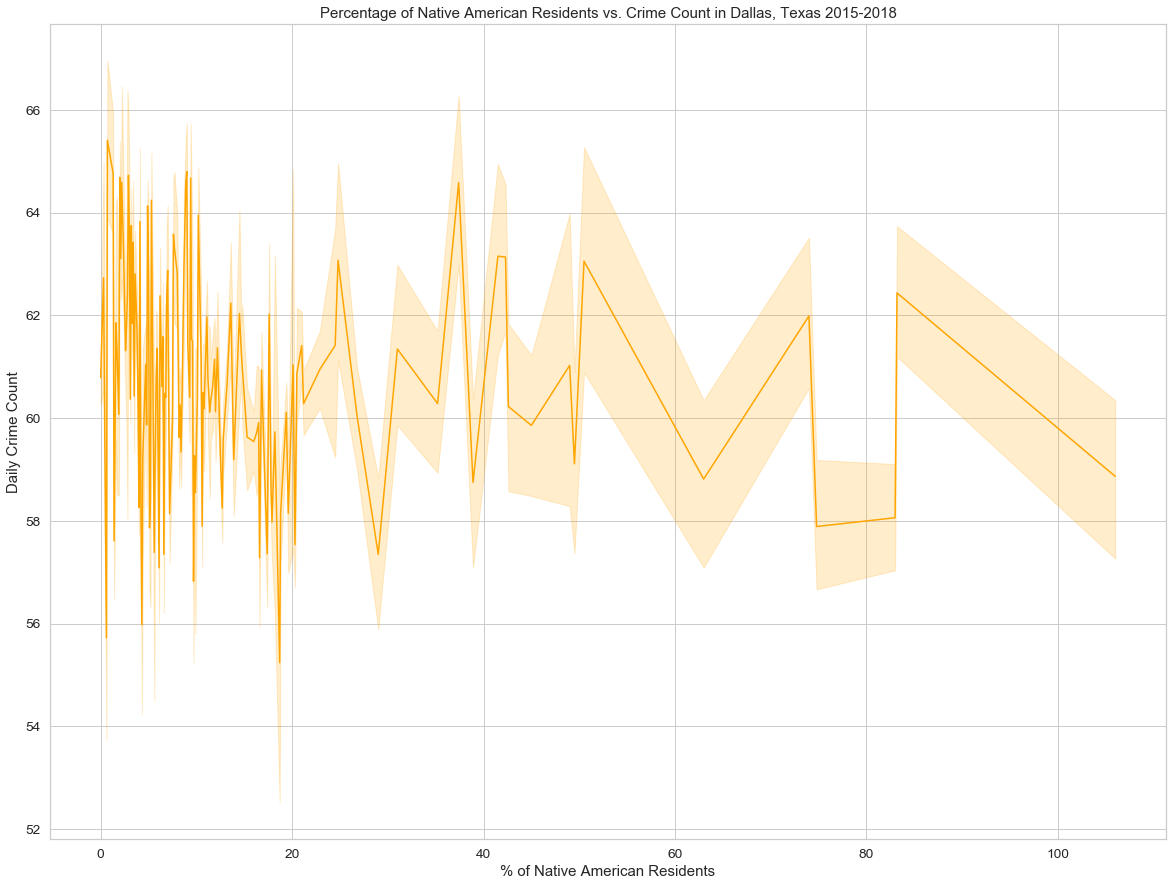

In [393]:
# What does the relationship between crime counts and % of Native residents look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_native'], y = df['daily_crime_count'], data = df, color = 'orange')
plt.title('Percentage of Native American Residents vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('% of Native American Residents')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

We see a ton of activity in the first part of this chart, which makes sense since there is a very small Native American population in Dallas. This graph is telling us that crime count is pretty high in smaller populations of Native Americans in Dallas.

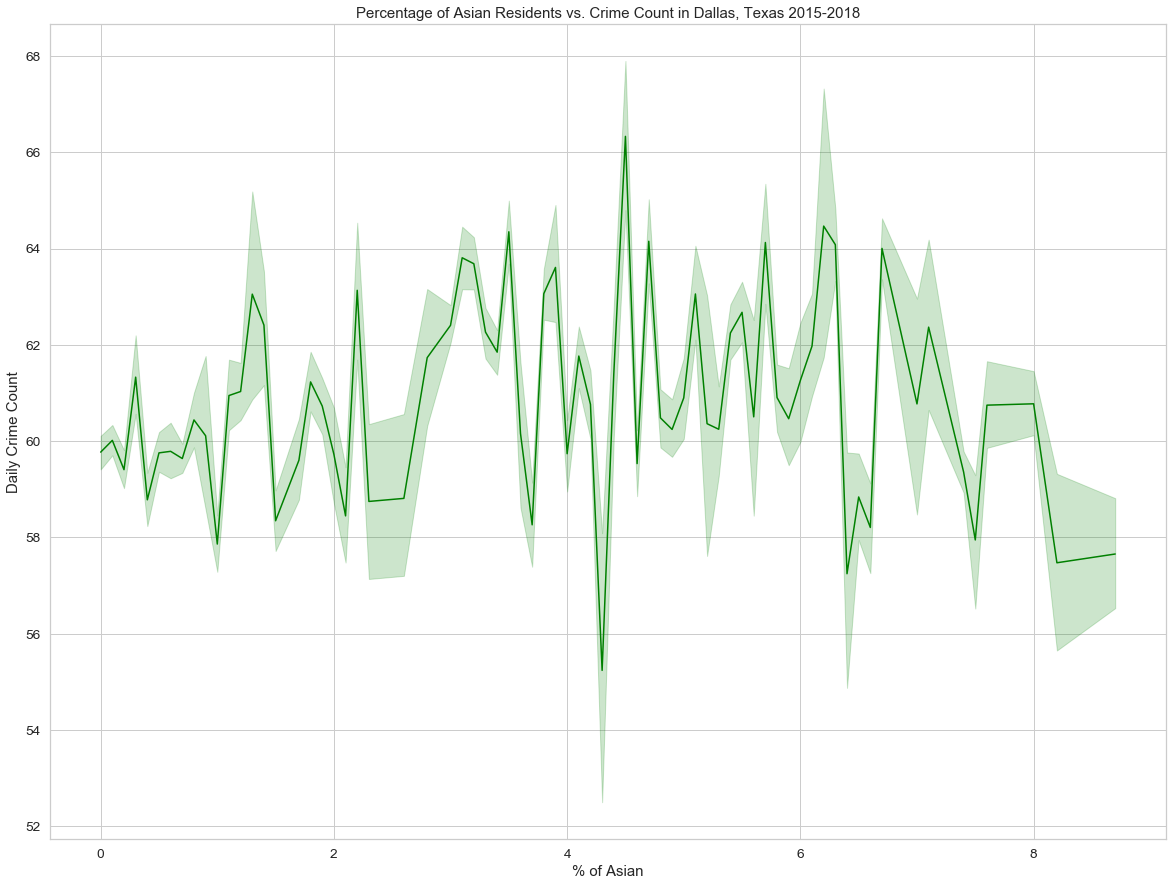

In [394]:
# What does the relationship between crime counts and % of Asian residents look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_asian'], y = df['daily_crime_count'], data = df, color = 'green')
plt.title('Percentage of Asian Residents vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('% of Asian')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

According to our data it also appears that Dallas has a relatively small percentage of the population that is Asian in specific areas. The interesting thing on this chart is the large downward spike around 4% implying that crime counts drastically lower in areas with an Asian population of 4%.

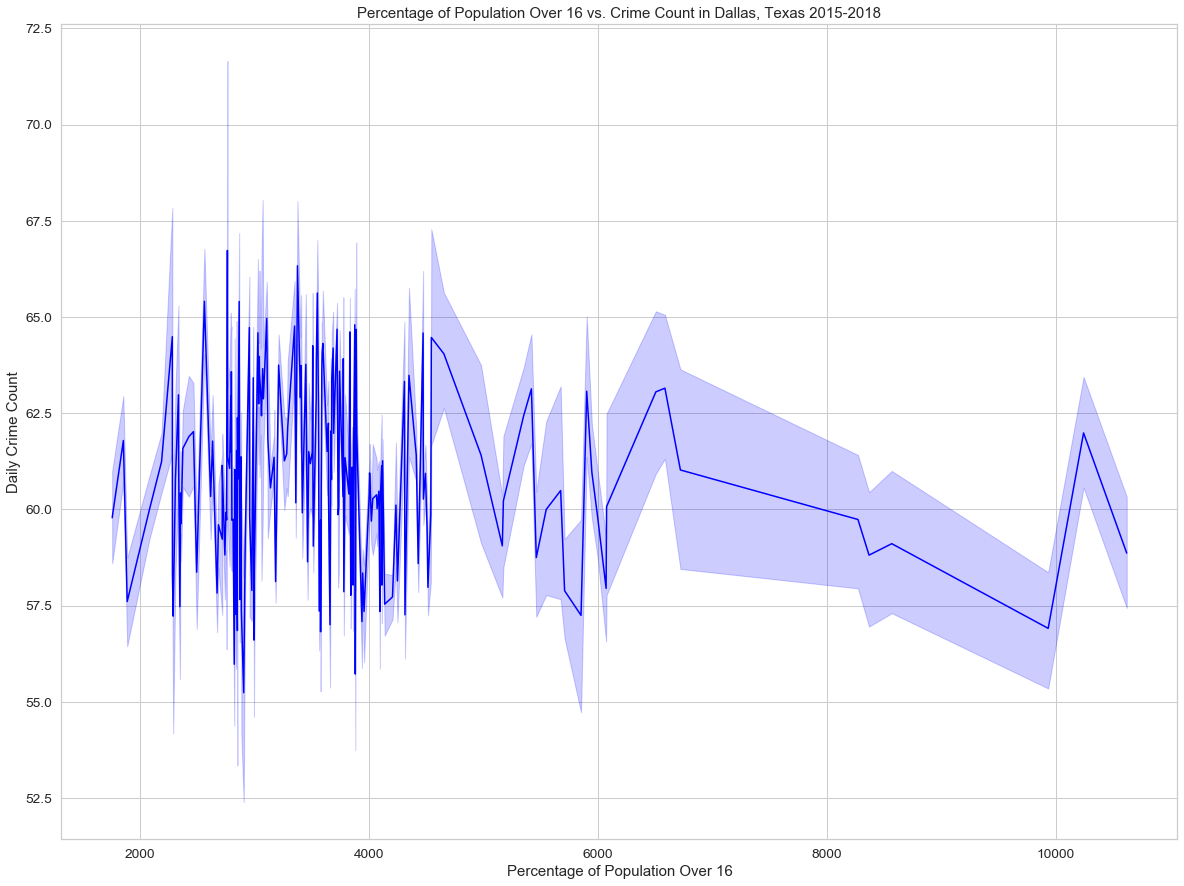

In [395]:
# # What does the relationship between crime counts and % of population over 16 years old look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_pop_over_16'], y = df['daily_crime_count'], data = df, color = 'blue')
plt.title('Percentage of Population Over 16 vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('Percentage of Population Over 16')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

We see that since there is a ton of movement in the first part of this graph that crime counts and population over 16 are most closely related when the population over 16 is smaller.

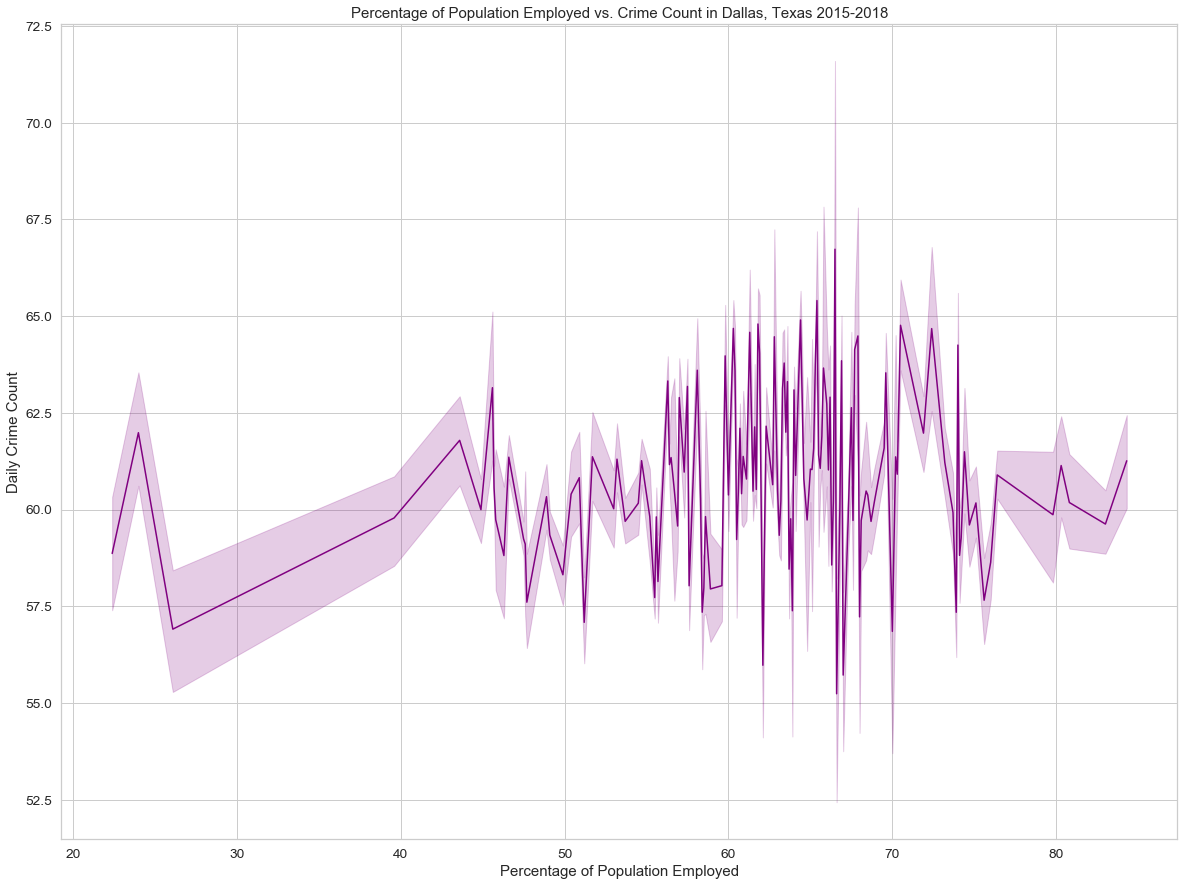

In [396]:
# What does the relationship between crime counts and % of population employed look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_employed'], y = df['daily_crime_count'], data = df, color = 'purple')
plt.title('Percentage of Population Employed vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('Percentage of Population Employed')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

In populations where 45- 75% of the population are employed the greatest activity in crime count occurs. This connection is weaker the further out you go from this group in either direction.

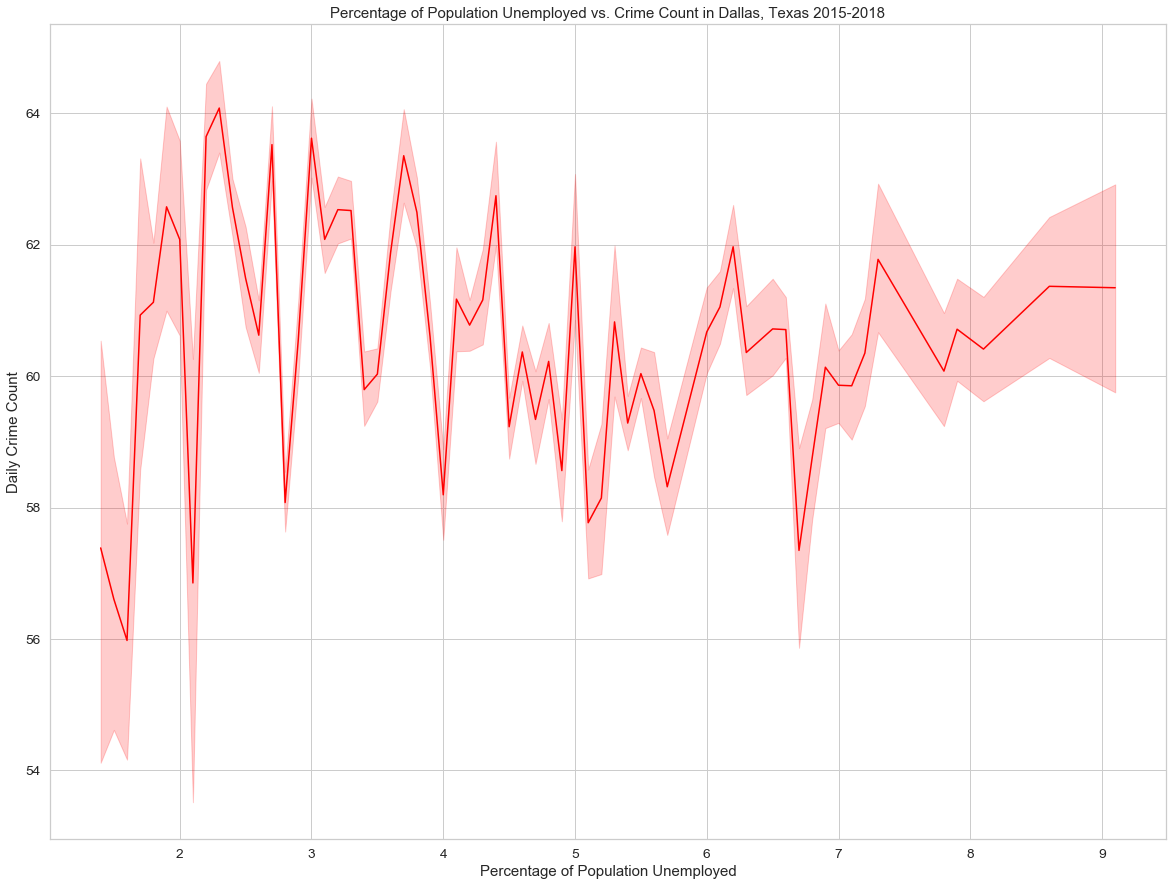

In [397]:
# What does the relationship between crime counts and % of the population that is unemployed look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_unemployed'], y = df['daily_crime_count'], data = df, color = 'red')
plt.title('Percentage of Population Unemployed vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('Percentage of Population Unemployed')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**
 
Crime counts increase in populations with more than 3% of the population experiencing unemployment but then levels out when a larger (8%) portion of the population is unemployed.

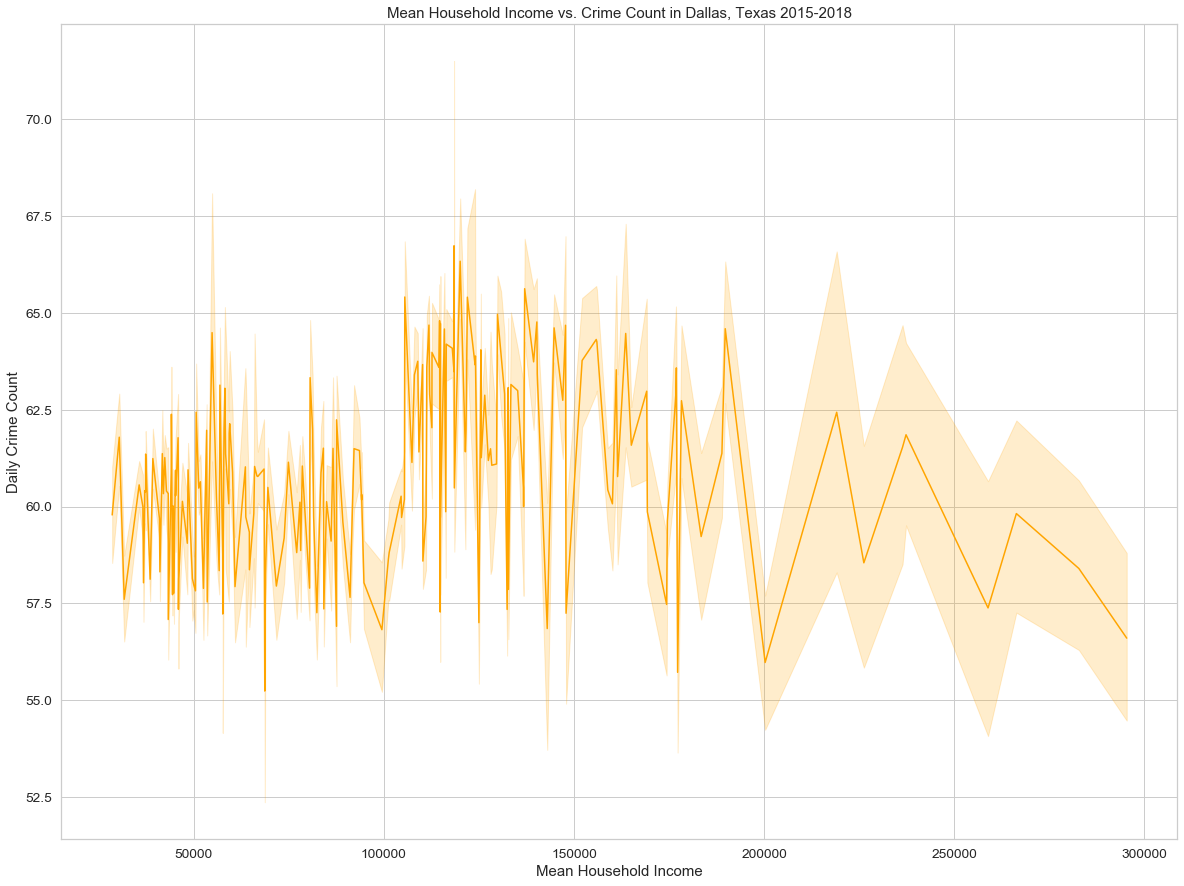

In [398]:
# What does the relationship between crime counts and mean household income look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['mean_household_income'], y = df['daily_crime_count'], data = df, color = 'orange')
plt.title('Mean Household Income vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('Mean Household Income')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

Households with a mean income of between 100,000 to 200,000 USD experience the most drastic activity in relation to crime count, while the amounts of crimes reported seems to fall after a household mean income of 250,000 USD.

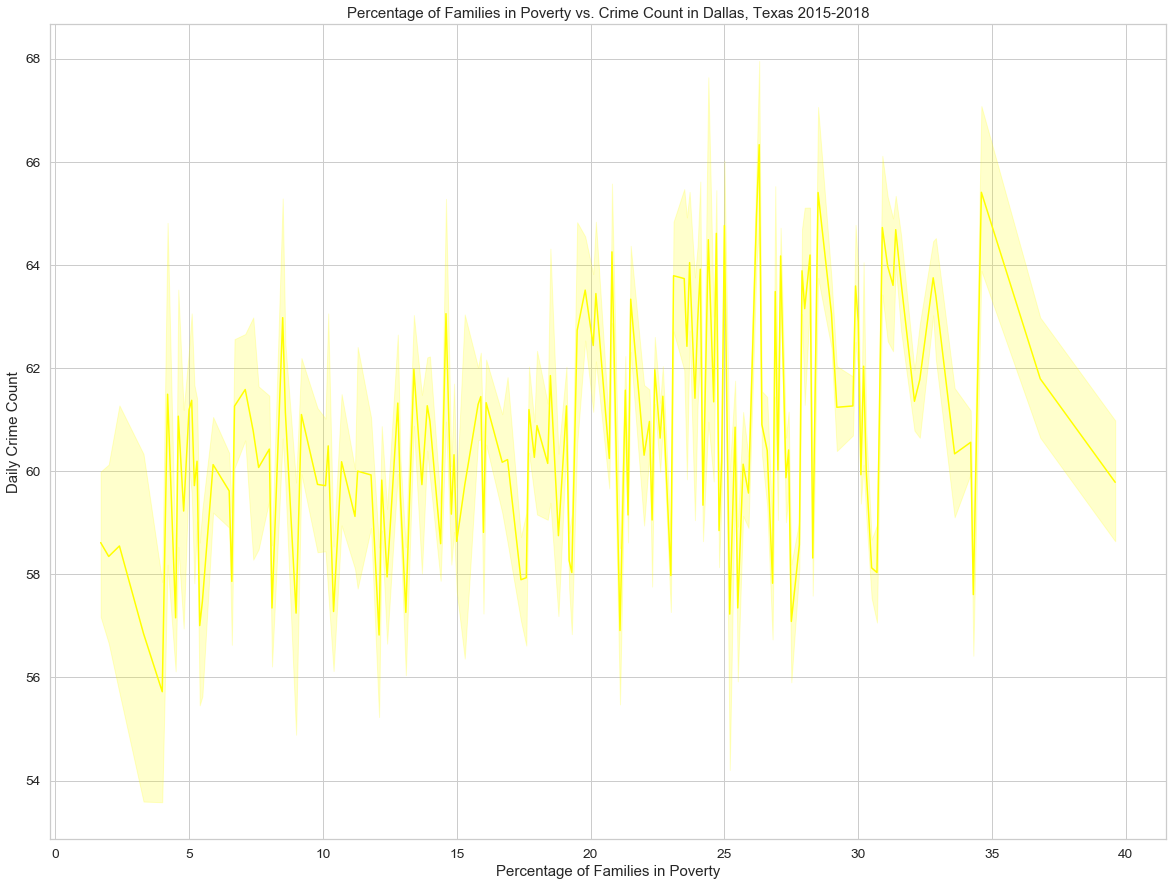

In [399]:
# What does the relationship between crime counts and % of families in poverty look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['%_families_poverty'], y = df['daily_crime_count'], data = df, color = 'yellow')
plt.title('Percentage of Families in Poverty vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('Percentage of Families in Poverty')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

This activity has almost a linear relationship to it. We can definately see an upward trend that as the percentages of families in poverty increase in an area the number of reported crimes increase as well.

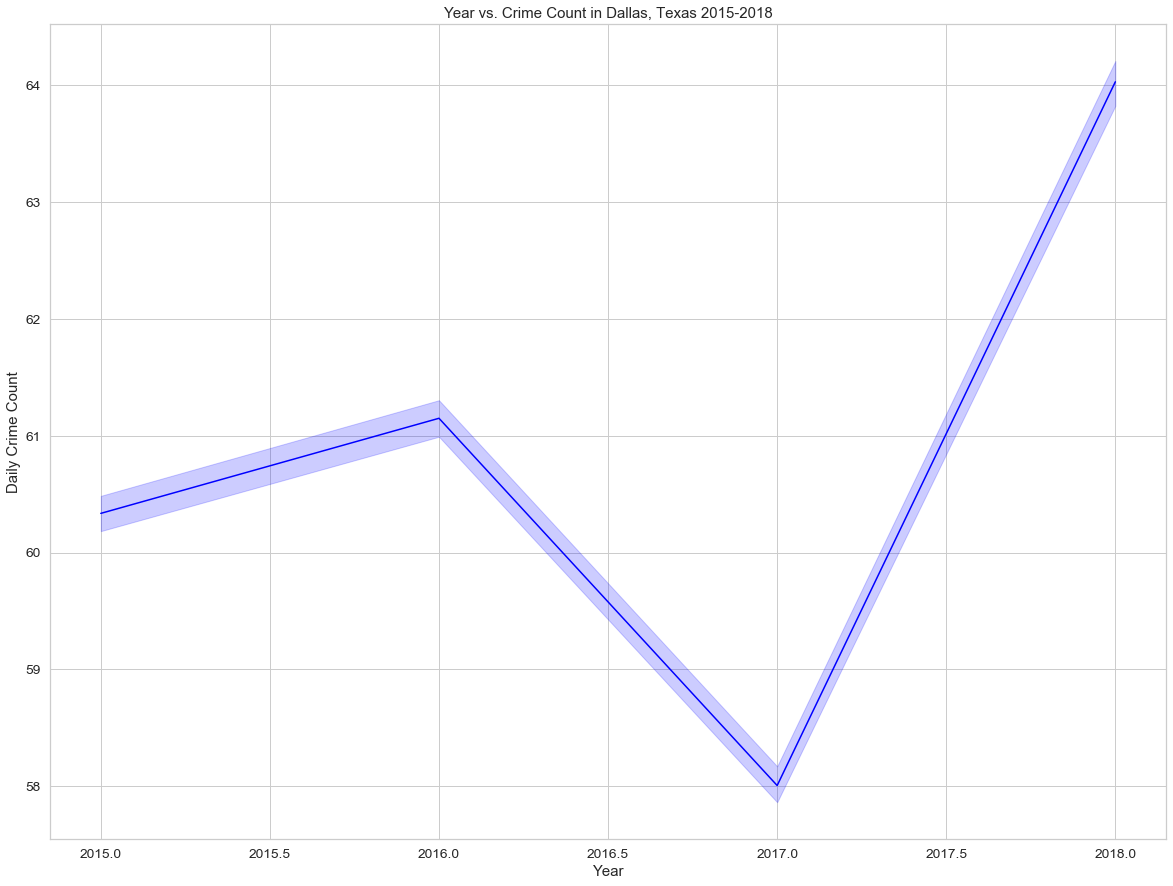

In [400]:
# What does the relationship between crime counts and year look like?
plt.figure(figsize = (20,15))
sns.lineplot(x= df['year'], y = df['daily_crime_count'], data = df, color = 'blue')
plt.title('Year vs. Crime Count in Dallas, Texas 2015-2018')
plt.xlabel('Year')
plt.ylabel('Daily Crime Count');

**What does this tells us about this relationship?**

We can see that the amount of reported crimes took a HUGE drop at the beginning of 2017 but began to increase shortly after.

### 1.3: Using Linear Regression and Ordinary Least Squares(OLS) to Validate Our Features
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

As we discussed earlier, in real-life situations we won't have the time to do a full ARIMA model on all data we are given, and sometimes the data we will be asked to look at won't actually have any real value to our business. With that in mind one quick way to see how important our features are to modeling is to use the OLS measures on each feature individually before looking at their combined scores. Since we only have two features here, daily crime count and temperature, that we are basing our model on this is a pretty short process.

In [401]:
import statsmodels.api as sm

X = df['temp_in_F']
Y = df['daily_crime_count']

# Looking at OLS for temp vs. target
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\gothv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      daily_crime_count   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5272.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:51:58   Log-Likelihood:            -3.3282e+05
No. Observations:               85066   AIC:                         6.656e+05
Df Residuals:                   85064   BIC:                         6.657e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6462      0.188    253.828      0.000      47.278      48.014
temp_in_F      0.1916      0.003     72.609      0.000       0.186       0.197
==============================================================================
Omnibus:                     2227.376   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2410.379
Skew:                           0.402   Prob(JB):                         0.00
Kurtosis:                       3.186   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We know that there are several important statistics on the chart above that can tell us whether our data is worth continuing with or not. First, we have our R Squared and Adjusted R Squared scores. Our R Squared score tells us how well our model explains the variance in our dataset. We only two feature we are considering, so our R Squared score is pretty low as our information only really relates to each other and doesn't really explain EVERYTHING that is happening. (This is most likely a result of adding in a large number of features and the fact that temperature doesn't really correlate to any other feature.) Another additional feature that is important to whether our model will be work out time is the P Value. Here we don't have a p value, but, once again, this may be due to the size of the dataset and the un-correlated-ness of our other data. We  can simplify our dataframe and try this test again, just to see if there is a noticable difference. 

In [402]:
# Simplfying our data below
temp_crime_only = df[['date_only','daily_crime_count', 'temp_in_F']]
temp_crime_only = temp_crime_only.groupby('date_only').mean()
temp_crime_only.head()

daily_crime_count  temp_in_F
date_only                               
2015-01-01                 81      34.35
2015-01-02                 52      38.73
2015-01-03                 67      43.90
2015-01-04                 47      34.73
2015-01-05                 38      35.69

In [403]:
# Running our OLS on our reduced data
X = temp_crime_only['temp_in_F']
Y = temp_crime_only['daily_crime_count']

# Looking at OLS for temp vs. target
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      daily_crime_count   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           7.38e-26
Time:                        11:51:58   Log-Likelihood:                -5716.0
No. Observations:                1461   AIC:                         1.144e+04
Df Residuals:                    1459   BIC:                         1.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6731      1.394     31.329      0.000      40.939      46.408
temp_in_F      0.2126      0.020     10.719      0.000       0.174       0.251
==============================================================================
Omnibus:                       32.864   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.598
Skew:                           0.232   Prob(JB):                     4.62e-11
Kurtosis:                       3.753   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R Squared score has increased as a result of simplifying our dataset, but we are still without a P Value. For the purposes of this project we will keep our  features as is and move on to setting up our dataframes for modeling.

## 2. Model Dataframes Set-Up
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

**Research question for our project:** Can we use past records of crimes and the corresponding weather for the day of the crime to help predict future crimes?

Since our research question focuses mainly on number of crimes per day and weather let's simplify our testing datasets to reflect these features. Since time series data is best analyzed as a univariate dataset we will have to create a few sub-datasets focusing on the individual features we want to treat as time series data, work with them individually, and then compare them to our other time series data to draw our final conclusions. Let's get started!

### 2.1: Date vs. Crime Count
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

In [404]:
# Since we've already created a daily crime count sub-df let's start there
daily_count.head()

date_only  daily_crime_count
1402 2015-01-01                 81
484  2015-01-02                 52
1128 2015-01-03                 67
248  2015-01-04                 47
47   2015-01-05                 38

In [405]:
# Changing the index of this df to date_only
daily_count.set_index('date_only', inplace = True)

In [406]:
# Sanity check: did our index actually reset?
daily_count.head()

daily_crime_count
date_only                    
2015-01-01                 81
2015-01-02                 52
2015-01-03                 67
2015-01-04                 47
2015-01-05                 38

In [407]:
# Let's take a quick look at this sub-df and it's details
daily_count.describe()

daily_crime_count
count            1461.00
mean               58.22
std                12.57
min                 1.00
25%                50.00
50%                57.00
75%                66.00
max               113.00

Now that we have our daily crime count and date as a seperate data frame we can move on to our date vs. temperature data frame.

### 2.2: Date vs. Temperature
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

In [408]:
# Creating our initial data frame for date and temperature
temp_df = df[['date_only', 'temp_in_F']].copy()

In [409]:
# Checking that it looks ok
temp_df.head()

date_only  temp_in_F
0 2015-01-01      34.35
1 2015-01-01      34.35
2 2015-01-01      34.35
3 2015-01-01      34.35
4 2015-01-01      34.35

In [410]:
# Smushing these down to have one date and one temp each
temp_df = temp_df.groupby('date_only').mean()

In [411]:
# Sanity check: did the smushing work correctly?
temp_df.head()

temp_in_F
date_only            
2015-01-01      34.35
2015-01-02      38.73
2015-01-03      43.90
2015-01-04      34.73
2015-01-05      35.69

In [412]:
# Let's look at the overall info for this dataset
temp_df.describe()

temp_in_F
count    1461.00
mean       68.46
std        15.98
min        22.41
25%        57.40
50%        70.30
75%        82.59
max        97.53

Excellent! We now have nice, neat sub-dataframes that we can now use to do our time series analysis modeling with! Next step: decomposing these!

## 3. Time Series Decomposition
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Although, at first glance, time series data appears to just be one set of data there are really four main components that must be dealt with seperately in order to process time series data correctly. These four parts are: trend, seasonality, noise/error, and base line data. Below we will decompose our time series datasets into their respective parts in order to better understand what is really happening in our data!

### 3.1: Decomposing Our Date vs. Crime Count Data
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

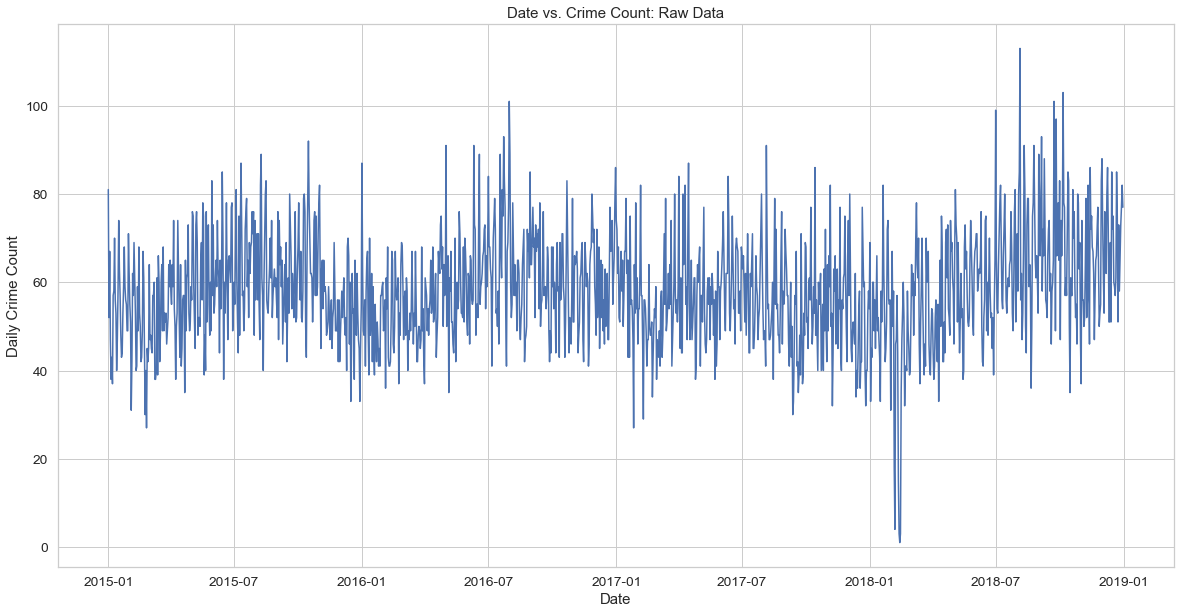

In [413]:
# Plotting our dataset to see what it looks like
plt.figure(figsize = (20,10))
plt.plot(daily_count)
plt.title('Date vs. Crime Count: Raw Data')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count');

Looking at the visualization above we can see that our data appears to have some seasonality (there are repeated spikes and valleys in the line), there is some sort of trend (our line almost has a "typical" wave look to it- it follows several up and down curves), and there seems to be some weird data happening around the beginning of 2018. Let's first take a closer look at that weird data before we decompose this data.

In [414]:
# What days did we have less than 20 crime reports?
daily_count.loc[daily_count['daily_crime_count']< 20]

daily_crime_count
date_only                    
2018-02-05                 18
2018-02-06                  4
2018-02-11                 15
2018-02-12                  3
2018-02-13                  1
2018-02-14                  3

Cognitively, we know that it is very unlikely that the Dallas Police Department, who serves a population of 1.3 million people daily, had several days with less than 20 reported crimes, so let's go ahead and drop these days.

In [415]:
daily_count= daily_count.loc[daily_count['daily_crime_count']> 20]

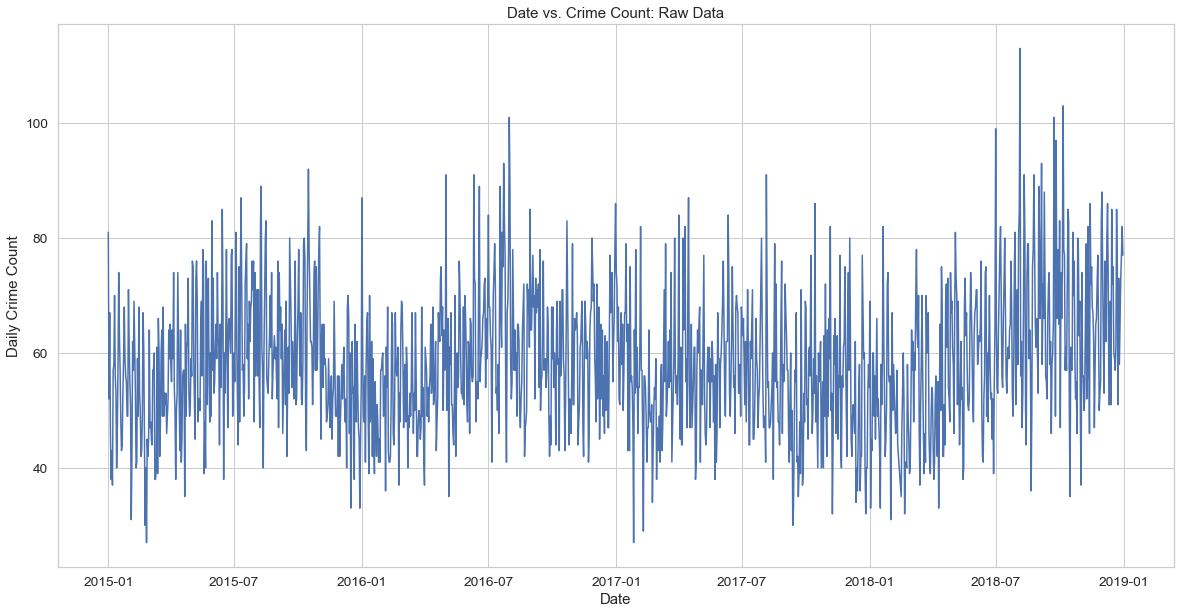

In [416]:
# Double checking, visually, that our data looks more regular now
plt.figure(figsize = (20,10))
plt.plot(daily_count)
plt.title('Date vs. Crime Count: Raw Data')
plt.xlabel('Date')
plt.ylabel('Daily Crime Count');

That looks so much better! Now that our data is more solid we can begin to seperate out the components of our time series.

In [417]:
# To do this we need to import the correct tools
from statsmodels.tsa.seasonal import seasonal_decompose

In [418]:
decomposition = seasonal_decompose(daily_count, freq = 365)

In [419]:
# Getting the values for our parts
trend_crime = decomposition.trend
seasonal_crime = decomposition.seasonal
noise_crime = decomposition.resid
observed_crime = decomposition.observed

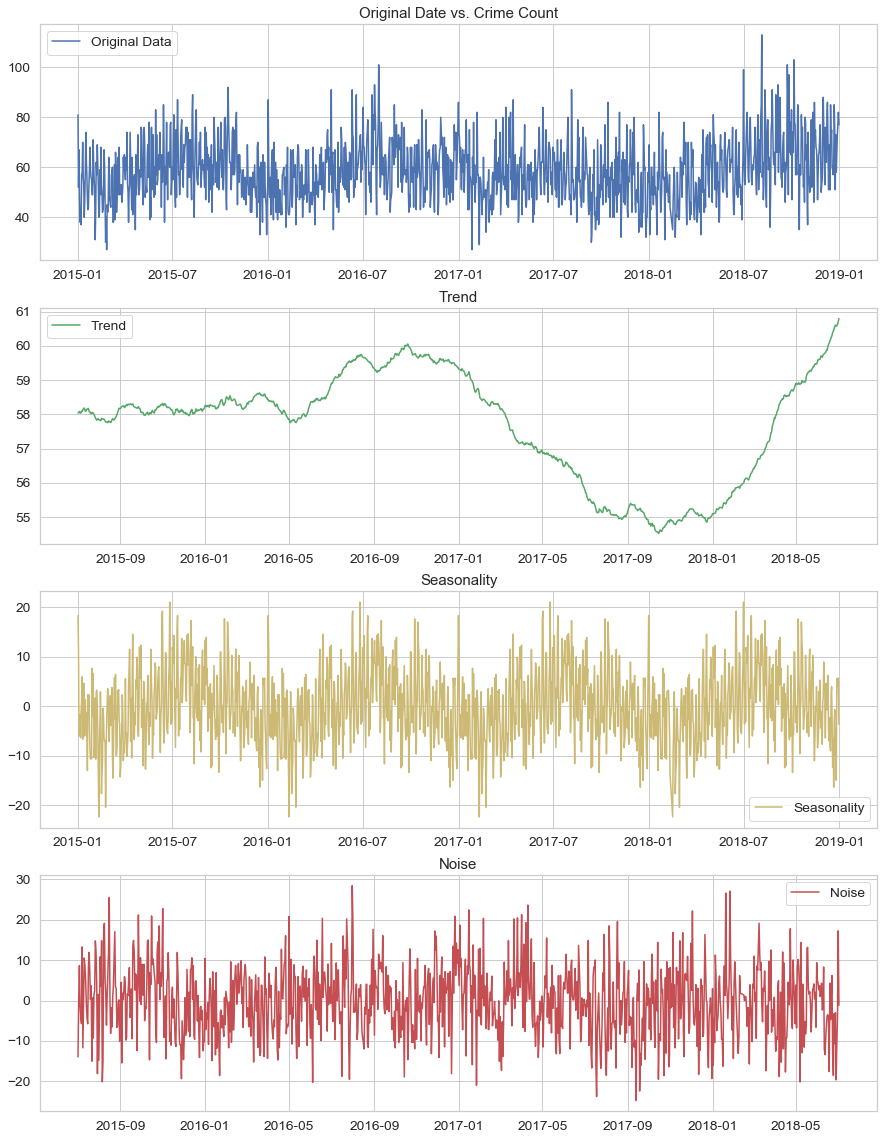

In [420]:
# Plotting out what these parts look like visually

# Plotting original data
plt.figure(figsize= (15,20))
plt.subplot(411)
plt.plot(daily_count, label = 'Original Data')
plt.legend(loc = 'best')
plt.title('Original Date vs. Crime Count')

# Plotting Trend
plt.subplot(412)
plt.plot(trend_crime, 'g', label = 'Trend')
plt.legend(loc = 'best')
plt.title('Trend')

# Plotting Seasonality
plt.subplot(413)
plt.plot(seasonal_crime,'y',  label = 'Seasonality')
plt.legend(loc = 'best')
plt.title('Seasonality')

# Plotting Noise
plt.subplot(414)
plt.plot(noise_crime, 'r', label = 'Noise')
plt.legend(loc = 'best')
plt.title('Noise');


While it is **SUPER COOL** to see our data "exploded" like this, we still have a few more steps to do before we can actually model and forecast this bad boy. Let's check the stationarity (checking to make sure the rolling average and standard deviation don't change over time).

There are two main ways we can check the stationarity of our data: looking at our rolling statistics and preforming a "Dickey-Fuller" test. Since we are just baby data scientists and time lords let's go a head and try both out to see what happens!

In [421]:
# Determining our rolling statistics
rol_mean = daily_count.rolling(12).mean()
rol_std = daily_count.rolling(12).std()

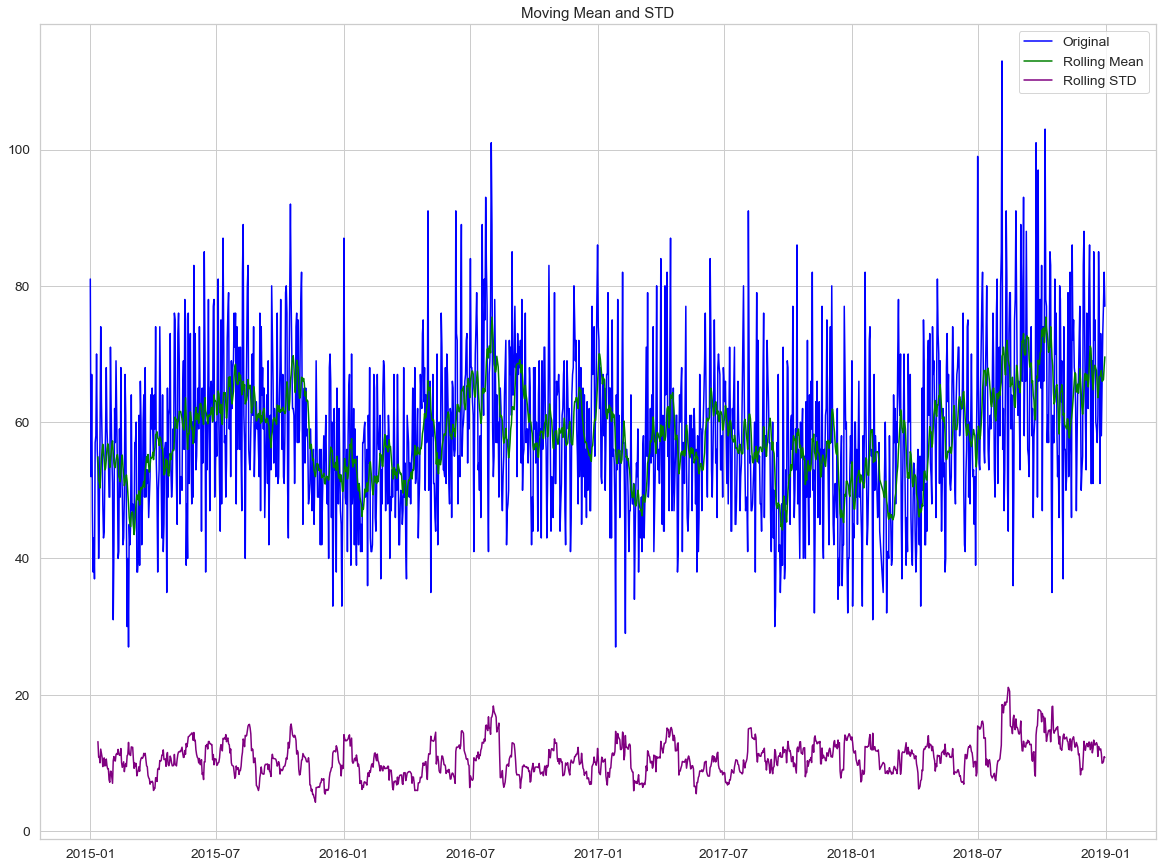

In [422]:
# What do these look like visually?
plt.figure(figsize = (20, 15))
original = plt.plot(daily_count, color = 'blue', label = 'Original')
mean = plt.plot(rol_mean, color = 'green', label = 'Rolling Mean')
std = plt.plot(rol_std, color = 'purple', label = 'Rolling STD')
plt.legend(loc = 'best')
plt.title('Moving Mean and STD')
plt.show(block = False)

In [423]:
# Trying out the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# Preforming our Dickey-Fuller test
test = adfuller(daily_count['daily_crime_count'], autolag = 'AIC')
print(test)

(-4.09509656454179, 0.0009867583237109304, 22, 1432, {'1%': -3.4349247631306237, '5%': -2.8635604442944658, '10%': -2.5678456715029183}, 10696.979932260716)


In [424]:
# Translating Our Results
dfoutput = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

print('Results of Dickey-Fuller Test: ')

for key, value in test[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput, '\n')

Results of Dickey-Fuller Test: 
Test Statistic                -4.10e+00
p-value                        9.87e-04
# Lags Used                    2.20e+01
Number of Observations Used    1.43e+03
Critical Value (1%)           -3.43e+00
dtype: float64 

Test Statistic                -4.10e+00
p-value                        9.87e-04
# Lags Used                    2.20e+01
Number of Observations Used    1.43e+03
Critical Value (1%)           -3.43e+00
Critical Value (5%)           -2.86e+00
dtype: float64 

Test Statistic                -4.10e+00
p-value                        9.87e-04
# Lags Used                    2.20e+01
Number of Observations Used    1.43e+03
Critical Value (1%)           -3.43e+00
Critical Value (5%)           -2.86e+00
Critical Value (10%)          -2.57e+00
dtype: float64 



For a Dickey-Fuller test there are two main areas we pay attention to: test statistic and critical value. We know our time series is stationary if our test statistic is smaller than our critical value. In our test above, since our numbers are on the negative scale, we see that on our first iteration of the test that our critical value(-3.43) is larger (closer to zero = bigger) than our test statistic (-4.10) so we can tell right away that our date vs. crime count time series is stationary! Let's move on to our second time series!

### 3.2: Decomposing Our Date vs. Temperature Data
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

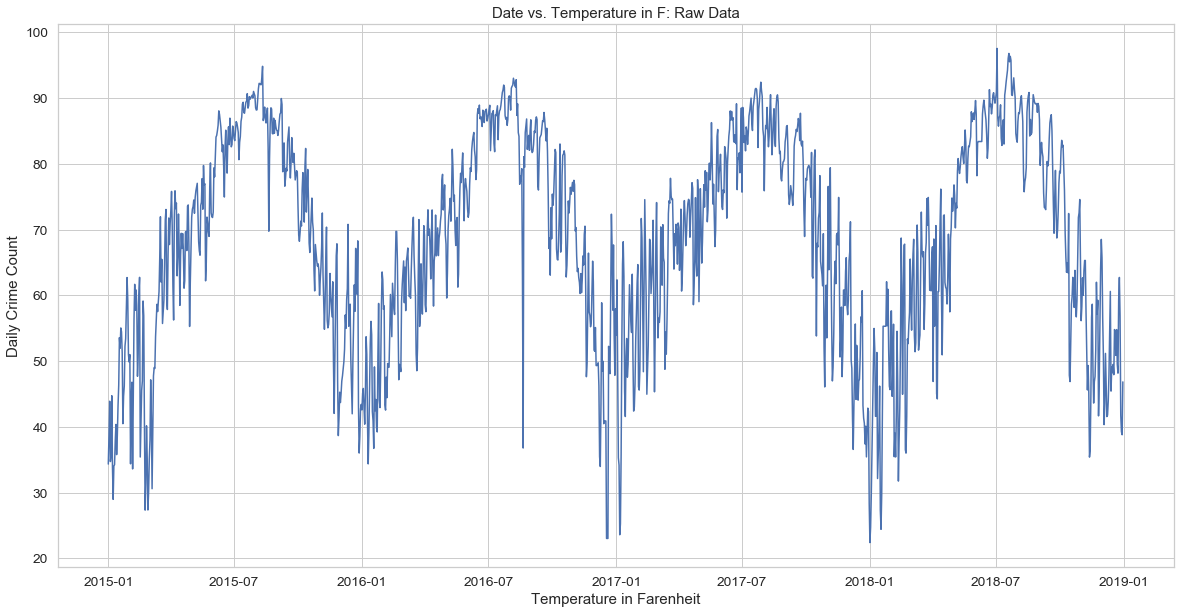

In [425]:
# Plotting our dataset to see what it looks like
plt.figure(figsize = (20,10))
plt.plot(temp_df)
plt.title('Date vs. Temperature in F: Raw Data')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Daily Crime Count');

Overall this data doesn't look too bad! We have a weird outlier in 2016 but it pretty much looks like a similar pattern to other years so we can move on to decomposing this data!

In [426]:
# Setting up the decomposition
decomposition = seasonal_decompose(temp_df, freq = 365)

In [427]:
# Getting the values for our parts
trend_temp = decomposition.trend
seasonal_temp = decomposition.seasonal
noise_temp = decomposition.resid

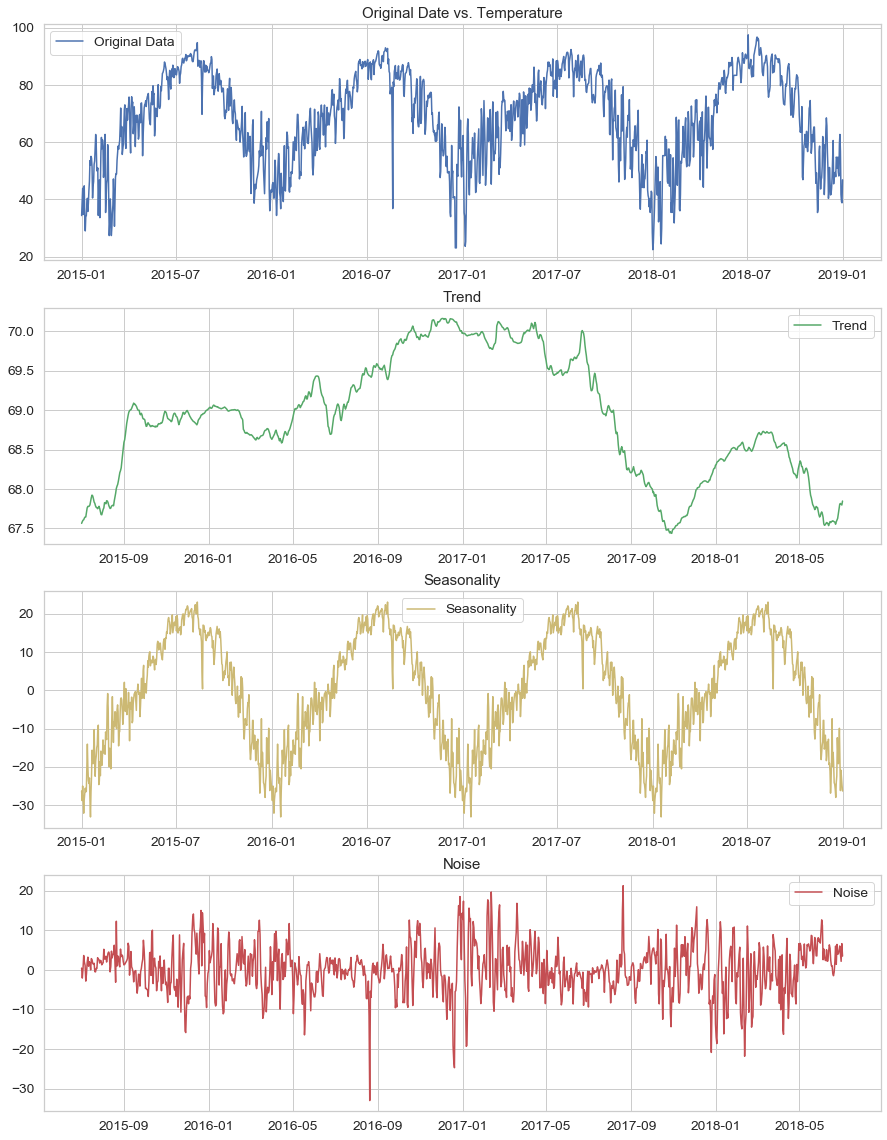

In [428]:
# Plotting out what these parts look like visually


# Plotting original data
plt.figure(figsize= (15,20))
plt.subplot(411)
plt.plot(temp_df, label = 'Original Data')
plt.legend(loc = 'best')
plt.title('Original Date vs. Temperature')

# Plotting Trend
plt.subplot(412)
plt.plot(trend_temp, 'g', label = 'Trend')
plt.legend(loc = 'best')
plt.title('Trend')

# Plotting Seasonality
plt.subplot(413)
plt.plot(seasonal_temp,'y',  label = 'Seasonality')
plt.legend(loc = 'best')
plt.title('Seasonality')

# Plotting Noise
plt.subplot(414)
plt.plot(noise_temp, 'r', label = 'Noise')
plt.legend(loc = 'best')
plt.title('Noise');

Just like we did above we need to test if this data is stationary or not.

In [429]:
# Determining our rolling statistics
rol_mean = temp_df.rolling(12).mean()
rol_std = temp_df.rolling(12).std()

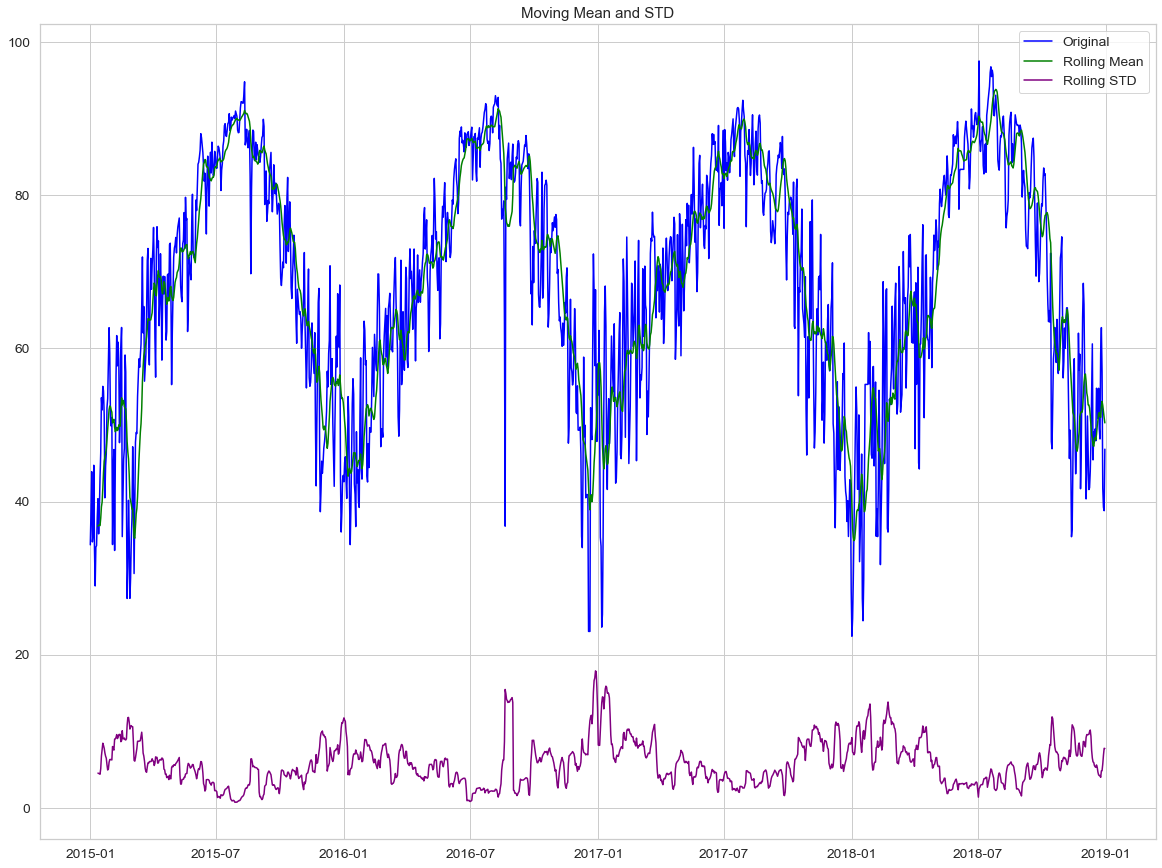

In [430]:
# What do these look like visually?
plt.figure(figsize = (20, 15))
original = plt.plot(temp_df, color = 'blue', label = 'Original')
mean = plt.plot(rol_mean, color = 'green', label = 'Rolling Mean')
std = plt.plot(rol_std, color = 'purple', label = 'Rolling STD')
plt.legend(loc = 'best')
plt.title('Moving Mean and STD')
plt.show(block = False)

In [431]:
# Preforming our Dickey-Fuller test
test = adfuller(temp_df['temp_in_F'], autolag = 'AIC')

# Translating these results into an easier to read format
dfoutput = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

print('Results of Dickey-Fuller Test: ')

for key, value in test[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput, '\n')

Results of Dickey-Fuller Test: 
Test Statistic                   -2.73
p-value                           0.07
# Lags Used                      13.00
Number of Observations Used    1447.00
Critical Value (1%)              -3.43
dtype: float64 

Test Statistic                   -2.73
p-value                           0.07
# Lags Used                      13.00
Number of Observations Used    1447.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
dtype: float64 

Test Statistic                   -2.73
p-value                           0.07
# Lags Used                      13.00
Number of Observations Used    1447.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64 



As stated above our goal, to prove that our time series is stationary, is to have a test statistic that is smaller than our critical value. Here we see that our critival value at 10% (-2.57) is larger than our test statistic (-2.73) so we know that our time series is stationary! Since both of our time series datasets are stationary we can use the data as it is and finally move on to the modeling portion of our time series analysis. 

## 4. Modeling Our Data, Oh My!
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Time series analysis, in most forms, is a univariate analysis. Since we are using the AMAZING Prophet package created by Facebook to help simplify and streamline Auto-Recursion modeling in time series data we are able to preform both  uni and multivariate models on our data. Let's start off simply with our univariate models.

Before we can do anything else let's go ahead and make the new sub-data frames we will use for our models!

In [432]:
# Editing our daily count info for prophet
daily_count.reset_index(inplace = True)
daily_count.rename(columns = {'date_only':'ds', 'daily_crime_count':'y'}, inplace = True)
daily_count.head()

ds   y
0 2015-01-01  81
1 2015-01-02  52
2 2015-01-03  67
3 2015-01-04  47
4 2015-01-05  38

In [433]:
# Setting up our temperature info to work with Prophet
temp_df.reset_index(inplace = True)
temp_df.rename(columns = {'date_only':'ds', 'temp_in_F':'y'}, inplace = True)
temp_df.head()

ds      y
0 2015-01-01  34.35
1 2015-01-02  38.73
2 2015-01-03  43.90
3 2015-01-04  34.73
4 2015-01-05  35.69

### 4.1: Importing 2019 Data and Creating New Sub-data Frames
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Since we already have real-time data for the majority of 2019 we can edit it now so we can compare it to our predicted values after modeling!

In [434]:
# Importing our 2019 data here
df2019 = pd.read_csv('df2019.csv')

In [435]:
# Checking to see what this data looks like
df2019.head()

Unnamed: 0               911_call_type  \
0           0  58 - ROUTINE INVESTIGATION   
1           1               40/01 - OTHER   
2           2                20 - ROBBERY   
3           3               40/01 - OTHER   
4           4      31 - CRIMINAL MISCHIEF   

                       type_of_incident       division  sector  \
0           ASSAULT -BODILY INJURY ONLY      NORTHWEST   520.0   
1             DOG BITE - INJURED PERSON      NORTHEAST   220.0   
2           ASSAULT -BODILY INJURY ONLY      NORTHWEST   510.0   
3        UNEXPLAINED DEATH (NO OFFENSE)  SOUTH CENTRAL   720.0   
4  CRIM MISCHIEF > OR EQUAL $100 < $750      SOUTHEAST   340.0   

  council_district date_of_occurrence  year_of_occurrence month_of_occurrence  \
0               D2         01/01/2019              2019.0             January   
1               D9         01/01/2019              2019.0             January   
2               D2         01/01/2019              2019.0             January   
3               D4         01/01/2019              2019.0             January   
4               D7         01/01/2019              2019.0             January   

  day1_of_the_week time_of_occurrence  day_of_the_year victim_type  \
0              Tue              03:00              1.0  Individual   
1              Tue              12:00              1.0  Individual   
2              Tue              04:55              1.0  Individual   
3              Tue              17:00              1.0  Individual   
4              Tue              19:00              1.0  Individual   

          victim_race        victim_ethnicity victim_gender  victim_age  \
0  Hispanic or Latino      Hispanic or Latino        Female        33.0   
1  Hispanic or Latino      Hispanic or Latino          Male        41.0   
2               Black  Non-Hispanic or Latino        Female        26.0   
3               Black  Non-Hispanic or Latino        Female        56.0   
4               Black  Non-Hispanic or Latino          Male        30.0   

  responding_officer_#1__badge_no responding_officer_#1__name  \
0                            8890        MCDANIEL,TONYA,MARIE   
1                            9844        SMITH JR,GARY,DONALD   
2                            7180           TAYLOR,DEBORA,ANN   
3                            8708              LIGHTLE,ERIC,C   
4                           11086                TAN,JADEN,HO   

  responding_officer_#2_badge_no responding_officer_#2__name  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                           6753              MERENDA,MARK,J   
4                            NaN                         NaN   

                         nibrs_crime_category  x_coordinate  y_cordinate  \
0                            ASSAULT OFFENSES      2.47e+06     6.99e+06   
1                               MISCELLANEOUS      2.53e+06     6.99e+06   
2                            ASSAULT OFFENSES      2.47e+06     6.99e+06   
3                               MISCELLANEOUS      2.48e+06     6.94e+06   
4  DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY      2.50e+06     6.96e+06   

   zip_code   date_only  year  month  day_of_year_number    month_year  \
0   75247.0  2019-01-01  2019      1                   1  January-2019   
1   75228.0  2019-01-01  2019      1                   1  January-2019   
2   75247.0  2019-01-01  2019      1                   1  January-2019   
3   75224.0  2019-01-01  2019      1                   1  January-2019   
4   75215.0  2019-01-01  2019      1                   1  January-2019   

   daily_crime_count  temp_in_F  humidity  percip_inches  
0                268       39.8     77.34            0.0  
1                268       39.8     77.34            0.0  
2                268       39.8     77.34            0.0  
3                268       39.8     77.34            0.0  
4  

In [436]:
# Dropping any null values!
df2019.dropna(inplace = True)

In [437]:
# Creating our date vs. crime count subset
crime2019 = pd.DataFrame(df2019['date_only'].value_counts())

In [438]:
# Standardizing our new sub-df and taking a quick peek!
crime2019.rename(columns = {'date_only':'count'}, inplace = True)
crime2019.reset_index(inplace = True)
crime2019['index'] = pd.to_datetime(crime2019['index'])
crime2019.set_index('index', inplace = True)
crime2019.sort_index(inplace= True)
crime2019.head()

count
index            
2019-01-01     88
2019-01-02     63
2019-01-03     54
2019-01-04     63
2019-01-05     84

In [439]:
# Slightly modifying our 2019 crime count list so we can use it to merge with our total crimes
crime_2019 = crime2019.copy()
crime_2019.reset_index(inplace = True)
crime_2019.rename(columns = {'index':'ds', 'count':'y'}, inplace = True)
crime_2019['ds']= pd.to_datetime(crime_2019['ds'])
crime_2019.head()

ds   y
0 2019-01-01  88
1 2019-01-02  63
2 2019-01-03  54
3 2019-01-04  63
4 2019-01-05  84

In [440]:
# Adding our 2019 data to our total data
total_crime = pd.concat([daily_count, crime_2019], axis = 0)

In [441]:
# What does our new df look like?
total_crime.head()

ds   y
0 2015-01-01  81
1 2015-01-02  52
2 2015-01-03  67
3 2015-01-04  47
4 2015-01-05  38

Excellent! Now that we have our date vs. crime count data let's move on to our date vs. temperature data.

In [442]:
# Creating our date vs. temperature data frame for 2019
temp2019 = pd.DataFrame(df2019[['date_only', 'temp_in_F']])

In [443]:
# Merging our temps down by day & prepping for Prophet
temp2019 = temp2019.groupby('date_only').mean()
temp2019.reset_index(inplace= True)
temp2019['date_only'] = pd.to_datetime(temp2019['date_only'])
temp2019.set_index('date_only', inplace = True)
temp2019.head()

temp_in_F
date_only            
2019-01-01      39.80
2019-01-02      35.17
2019-01-03      37.36
2019-01-04      44.26
2019-01-05      49.33

In [444]:
# Making another sub-df to help us in merging with total temperature data
temp_2019 = temp2019.copy()
temp_2019.reset_index(inplace= True)
temp_2019.rename(columns = {'date_only':'ds', 'temp_in_F':'y'}, inplace= True)


#Converting our date to datetime
temp_2019['ds']= pd.to_datetime(temp_2019['ds'])
temp_2019.head()

ds      y
0 2019-01-01  39.80
1 2019-01-02  35.17
2 2019-01-03  37.36
3 2019-01-04  44.26
4 2019-01-05  49.33

In [445]:
# Creating a master temp df
total_temp = pd.concat([temp_df, temp_2019], axis = 0)
total_temp.tail()

ds      y
286 2019-10-25  48.75
287 2019-10-26  54.81
288 2019-10-27  60.83
289 2019-10-28  59.27
290 2019-10-29  48.05

In [446]:
#Adding our prior year dataframes together 
all_old = pd.merge(daily_count, temp_df, how='inner', on = 'ds')
all_old.rename(columns = {'y_x':'y', 'y_y':'temp'}, inplace = True)
all_old.head()

ds   y   temp
0 2015-01-01  81  34.35
1 2015-01-02  52  38.73
2 2015-01-03  67  43.90
3 2015-01-04  47  34.73
4 2015-01-05  38  35.69

In [447]:
crime_2019.head()

ds   y
0 2019-01-01  88
1 2019-01-02  63
2 2019-01-03  54
3 2019-01-04  63
4 2019-01-05  84

In [448]:
# Adding all of our 2019 data together
all_new = pd.merge(crime_2019, temp_2019, how= 'inner', on = 'ds')
all_new.rename(columns = {'y_x':'y', 'y_y':'temp'}, inplace = True)
all_new.head()                          

ds   y   temp
0 2019-01-01  88  39.80
1 2019-01-02  63  35.17
2 2019-01-03  54  37.36
3 2019-01-04  63  44.26
4 2019-01-05  84  49.33

Now that all of our data is neatly combined we can split our final data into test and training sets.

In [449]:
# Creating a split of crimes for testing and training - crime
total_crime['year'] = total_crime['ds'].dt.year
train_crime = total_crime.loc[total_crime['year'] <= 2017]
test_crime = total_crime.loc[total_crime['year']> 2017]

In [450]:
# Drop the years column and finish
train_crime.drop(columns= 'year', inplace = True)
test_crime.drop(columns = 'year', inplace = True)
total_crime.drop(columns = 'year', inplace = True)

C:\Users\gothv\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [451]:
# Creating a split of crimes for testing and training - temp
total_temp['year'] = total_temp['ds'].dt.year
train_temp = total_temp.loc[total_temp['year'] <= 2017]
test_temp = total_temp.loc[total_temp['year']> 2017]
train_temp.drop(columns = 'year', inplace = True)
test_temp.drop(columns = 'year', inplace = True)
total_temp.drop(columns = 'year', inplace = True)

In [452]:
# Creating another plotting version of total crime, temp, and all
plot_crime= total_crime.set_index('ds', inplace = True)
plot_temp= total_temp.set_index('ds', inplace = True)
plot_all = final_df.set_index('ds', inplace= True)

Hooray! We now have training and testing datasets for data! Let's move on to modeling!

### 4.2: Modeling Our Daily Crime Count Data and Forecasting
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Now that we have all of our data (and sub-datasets) set up we can begin with our univariate modeling. Since we are using the Prophet package to assist in our modeling we are limited with the amount of tuning and refining we can do in our modeling. Most of what we do to refine our models will be on the front end with how we set our data up, split our data, and what sub-sets to use when. 

Important note:

Above we have two seperate sets of data for our different approaches to modeling. First, we have the actual collected data (daily counts from 2015 to 2018 and data from 2019 only) in two seperate databases. Additionally, we have a user-created split  the overall data (combined data from 2015-20017 and combined data from 2018 to 2019). Due to the lack of options for model tuning we will try out both datasets and approaches to see which works best!

In [453]:
# Setting up our model in Prophet - Original Crime Data ASIS
model_crime = Prophet(daily_seasonality = True)
model_crime.fit(daily_count)

In [454]:
# Forecasting with our actual 2019 data
crime_test_fcst = model_crime.predict(df=crime_2019)

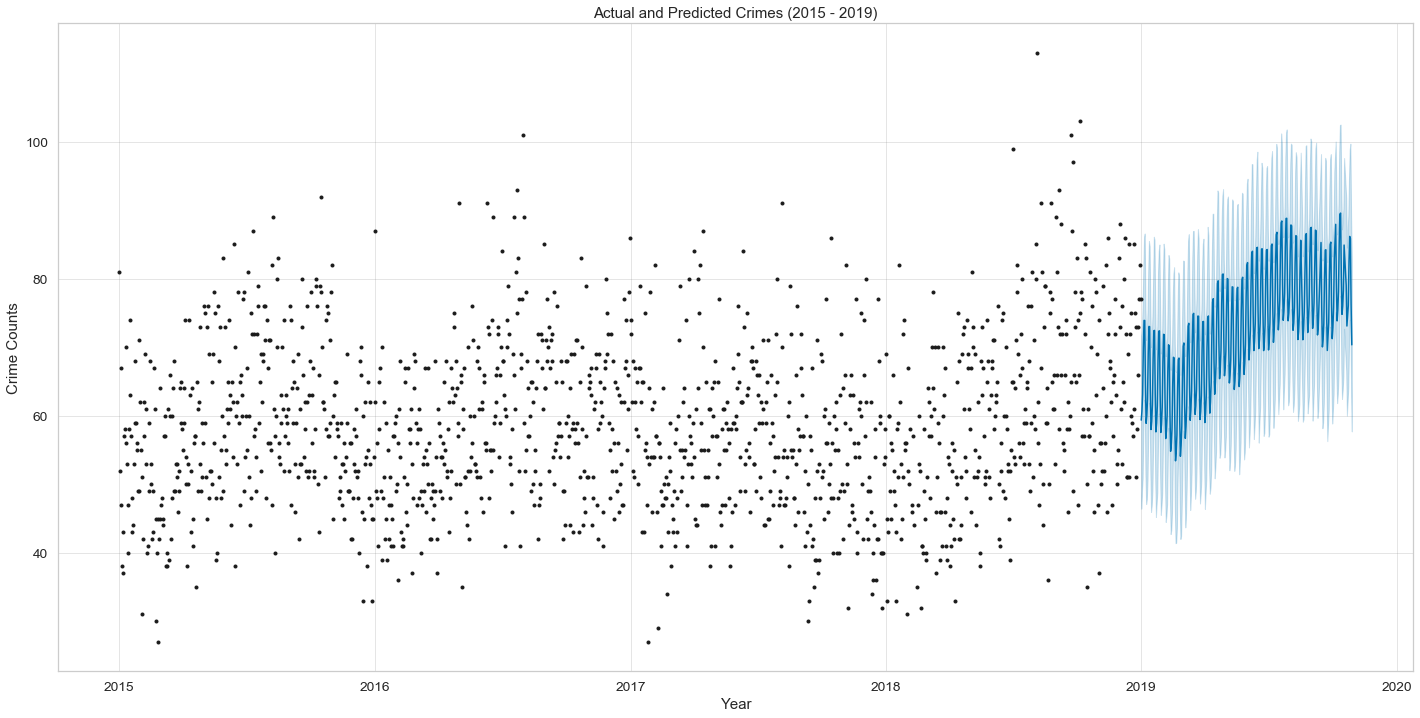

In [455]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)
fig = model_crime.plot(crime_test_fcst, ax=ax)
plt.title('Actual and Predicted Crimes (2015 - 2019)')
plt.xlabel('Year')
plt.ylabel('Crime Counts');

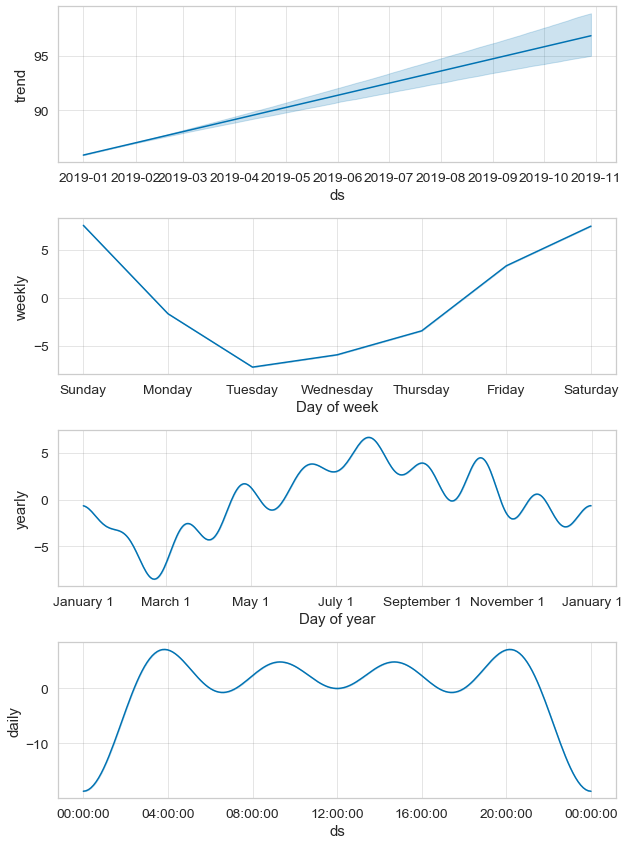

In [456]:
# Plot the components (exploded view)
fig = model_crime.plot_components(crime_test_fcst)
plt.tight_layout()

In [457]:
# Run test statistics
mse_crime_a = mean_squared_error(y_true=crime_2019['y'],y_pred=crime_test_fcst['yhat'])
mae_crime_a = mean_absolute_error(y_true=crime_2019['y'],y_pred=crime_test_fcst['yhat'])

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_crime_a = mean_absolute_percentage_error(y_true=crime_2019['y'],y_pred=crime_test_fcst['yhat'])

We will review what these statistics mean to our models below!

In [458]:
# Setting up our model in Prophet - crime training
model_crime = Prophet(daily_seasonality = True)
model_crime.fit(train_crime)

In [459]:
# Using our test data to make predictions
crime_test_fcstb = model_crime.predict(df=test_crime)

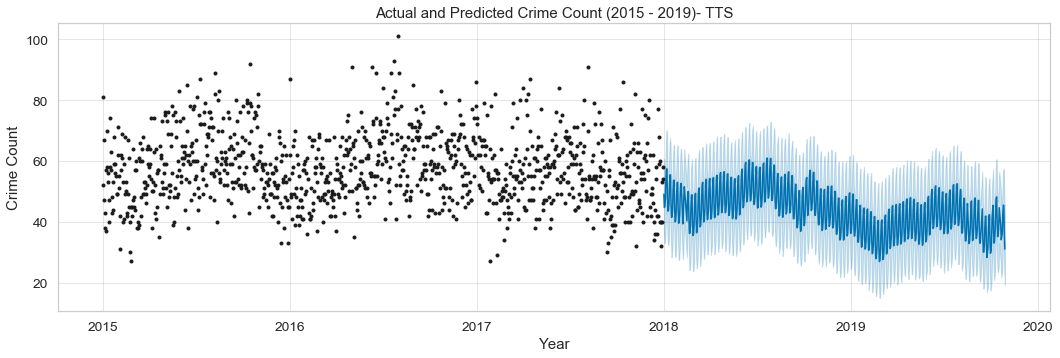

In [460]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_crime.plot(crime_test_fcstb, ax=ax)
plt.title('Actual and Predicted Crime Count (2015 - 2019)- TTS')
plt.xlabel('Year')
plt.ylabel('Crime Count');

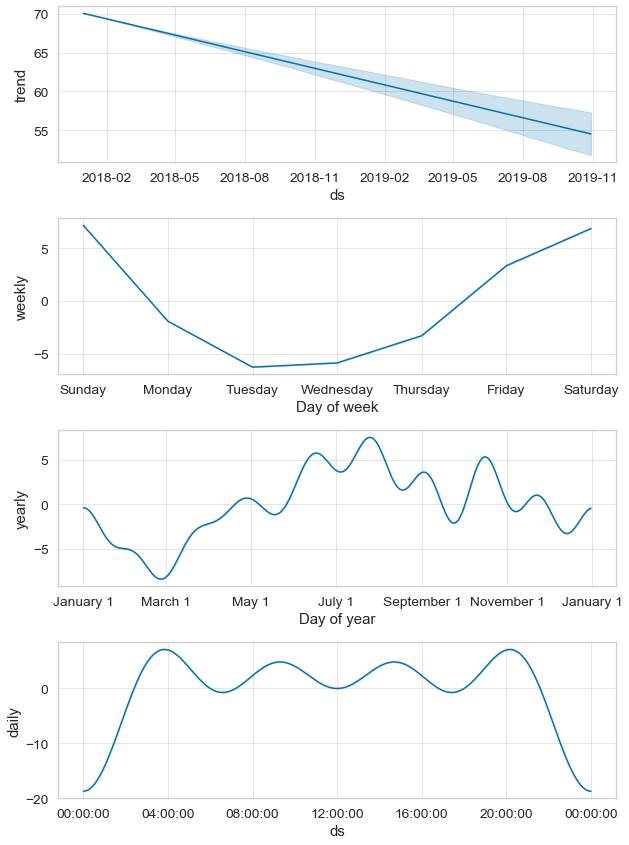

In [461]:
# What do the individual components of this forecast look like?
fig = model_crime.plot_components(crime_test_fcstb)
plt.tight_layout()

Let's now look at what our actual data looks like versus our predictions!

In [462]:
# Making a quick adjustment for modeling!
crime_for1 = crime_test_fcst.copy()
crime_for2 = crime_test_fcstb.copy()

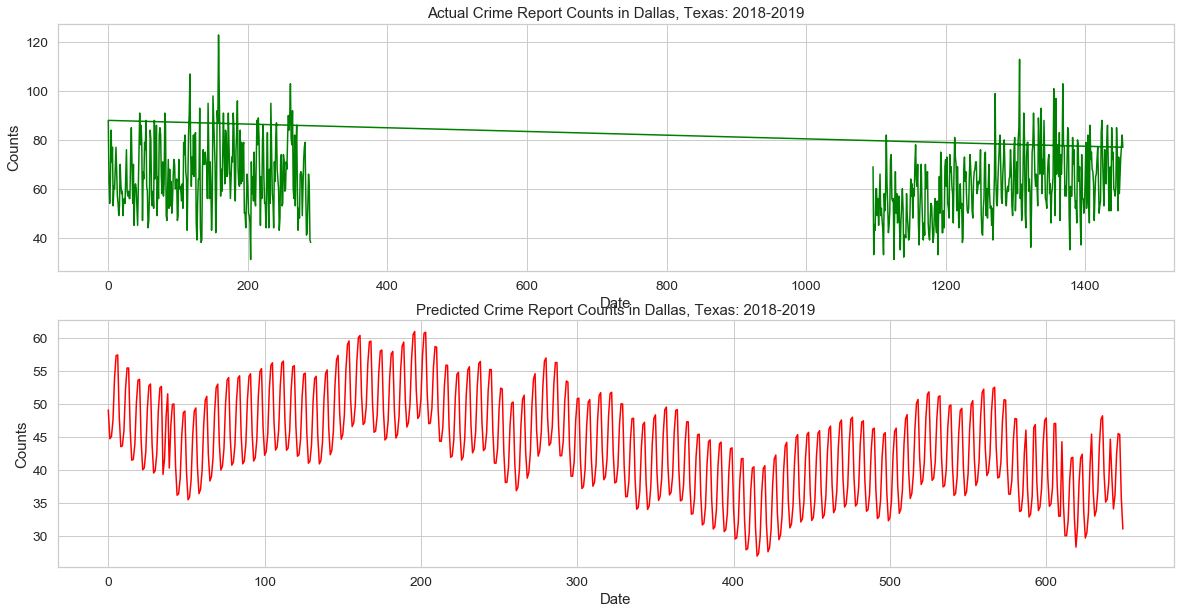

In [463]:
# What does predicted 2018 & 2019 crimes look like vs. actual?
plt.figure(figsize= (20,10))

# Plotting our actual data
plt.subplot(211)
plt.plot(test_crime['y'], color= 'green')
plt.title('Actual Crime Report Counts in Dallas, Texas: 2018-2019')
plt.xlabel('Date')
plt.ylabel('Counts');

# Plotting predicted crimes
plt.subplot(212)
plt.plot(crime_for2['yhat'], color = 'red')
plt.title('Predicted Crime Report Counts in Dallas, Texas: 2018-2019')
plt.xlabel('Date')
plt.ylabel('Counts');


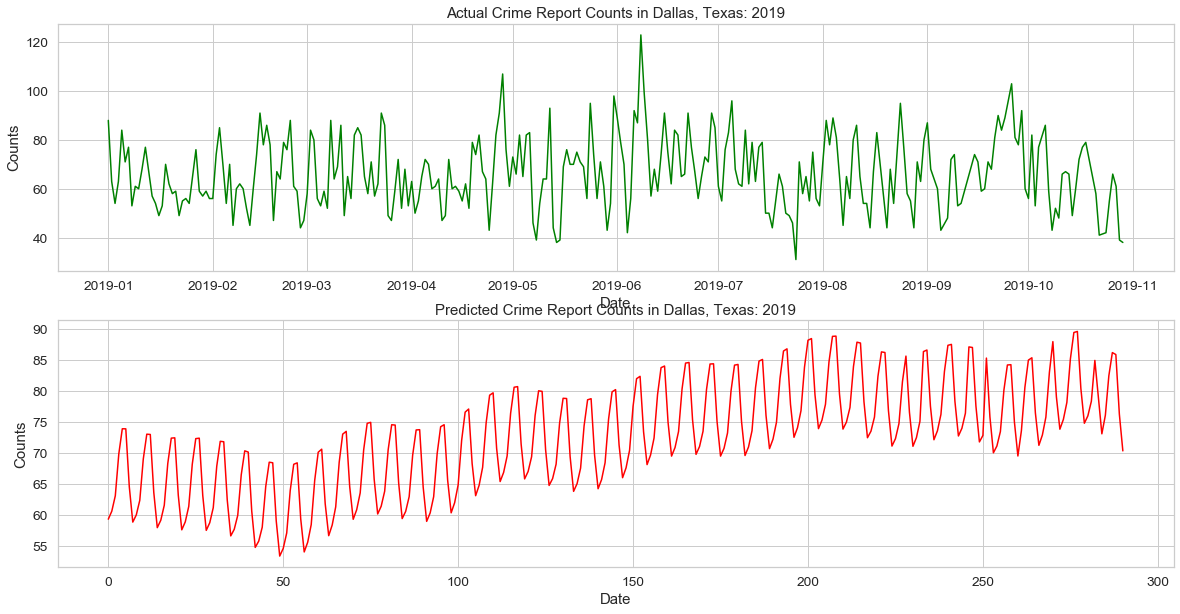

In [464]:
# What do predicted 2019 crimes look like vs. actual?
plt.figure(figsize= (20,10))

# Plotting our actual data
plt.subplot(211)
plt.plot(crime2019['count'], color= 'green')
plt.title('Actual Crime Report Counts in Dallas, Texas: 2019')
plt.xlabel('Date')
plt.ylabel('Counts');

# Plotting predicted crimes
plt.subplot(212)
plt.plot(crime_for1['yhat'], color = 'red')
plt.title('Predicted Crime Report Counts in Dallas, Texas: 2019')
plt.xlabel('Date')
plt.ylabel('Counts');


In [465]:
# Run test statistics
mse_crime_b = mean_squared_error(y_true= test_crime['y'],y_pred= crime_test_fcstb['yhat'])
mae_crime_b = mean_absolute_error(y_true= test_crime['y'],y_pred= crime_test_fcstb['yhat'])

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_crime_b = mean_absolute_percentage_error(y_true= test_crime['y'],y_pred=crime_test_fcstb['yhat'])

In [466]:
print('Crime Test A Statistics:')
print('The mean squared error is: ', mse_crime_a)
print('The mean absolute error is: ', mae_crime_a)
print('The mean absolute percentage error is :', mape_crime_a)
print('\n')

print('Crime Test B Statistics:')
print('The mean squared error is: ', mse_crime_b)
print('The mean absolute error is: ', mae_crime_b)
print('The mean absolute percentage error is :', mape_crime_b)

Crime Test A Statistics:
The mean squared error is:  231.6692239592333
The mean absolute error is:  12.231039459770427
The mean absolute percentage error is : 21.032825755333036


Crime Test B Statistics:
The mean squared error is:  587.8138164846321
The mean absolute error is:  20.292151386087223
The mean absolute percentage error is : 29.70720944739894


We can see several things in our test statistics. Let's start with our mean squared error. We know that the closer a mean squared error(MSE) is to zero the better the model is. We can see that our model with our real data divisions did the best since it has the lower MSE score. Our mean absolute percentage error (MAPE) is the measurement of how accurate our model is. As with MSE we want our numbers to be lower since this tells us that there is less error. 

Based on our statistics above it would be best for us to continue to use our originally split data as our test and train sets and disregard our self-made split data. Let's move on to temperature!

### 4.3: Modeling Our Daily Temperature Data and Forecasting
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

In [467]:
# Creating our model for temperature data
model_temp = Prophet(daily_seasonality = True)
model_temp.fit(temp_df)

In [468]:
# Making our ste of predictions using our actual 2019 data
temp_test_fcsta = model_temp.predict(df = temp_2019)

<Figure size 1440x1080 with 0 Axes>

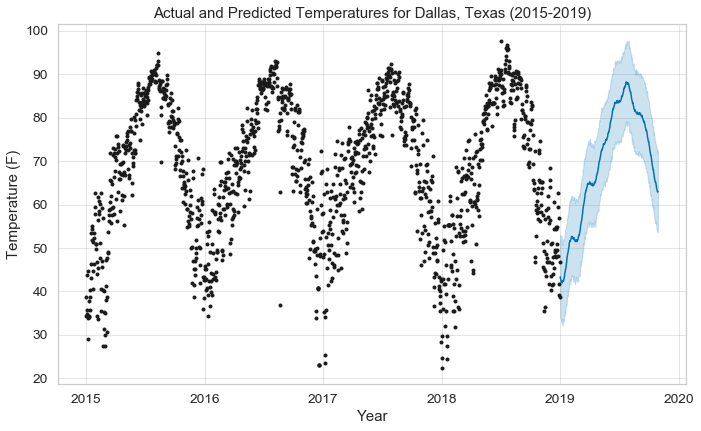

In [469]:
# What does this look like visually?
plt.figure(figsize= (20,15))
temp_plot1 = model_temp.plot(temp_test_fcsta)
plt.title('Actual and Predicted Temperatures for Dallas, Texas (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)');

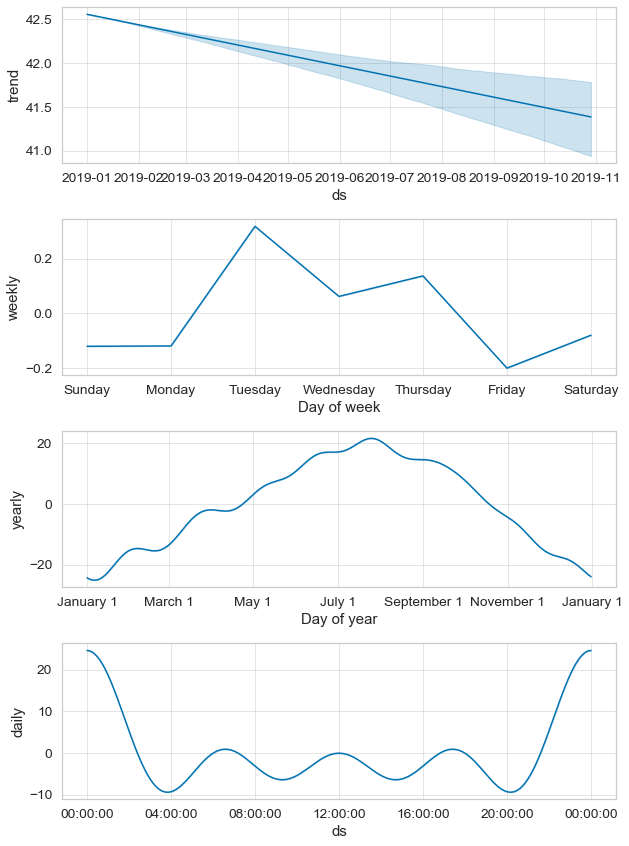

In [470]:
# Plot the components- original data
fig = model_temp.plot_components(temp_test_fcsta)
plt.tight_layout()

In [471]:
# Test statistics, yo!
mse_temp_a = mean_squared_error(y_true= temp_2019['y'],y_pred= temp_test_fcsta['yhat'])
mae_temp_a = mean_absolute_error(y_true= temp_2019['y'],y_pred= temp_test_fcsta['yhat'])

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_temp_a = mean_absolute_percentage_error(y_true= temp_2019['y'],y_pred= temp_test_fcsta['yhat'])

Look below for our statistics and a breakdown of what they mean!

In [472]:
# Modeling our temperature data with our self-created split sets
model_temp = Prophet(daily_seasonality = True)
model_temp.fit(train_temp)

In [473]:
# Making another set of predictions using our test data
temp_test_fcstb = model_temp.predict(df = test_temp)

Text(98.625, 0.5, 'Temperature (F)')

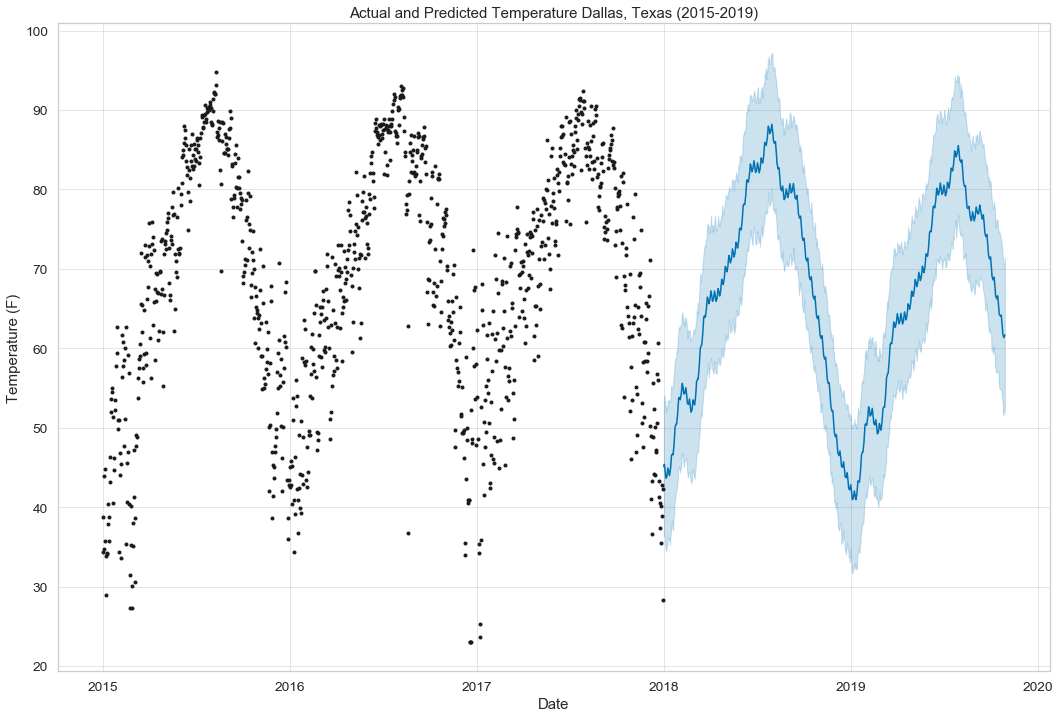

In [474]:
# Plot the forecast- Self made split data
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(15)
fig = model_temp.plot(temp_test_fcstb, ax=ax)
plt.title('Actual and Predicted Temperature Dallas, Texas (2015-2019)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

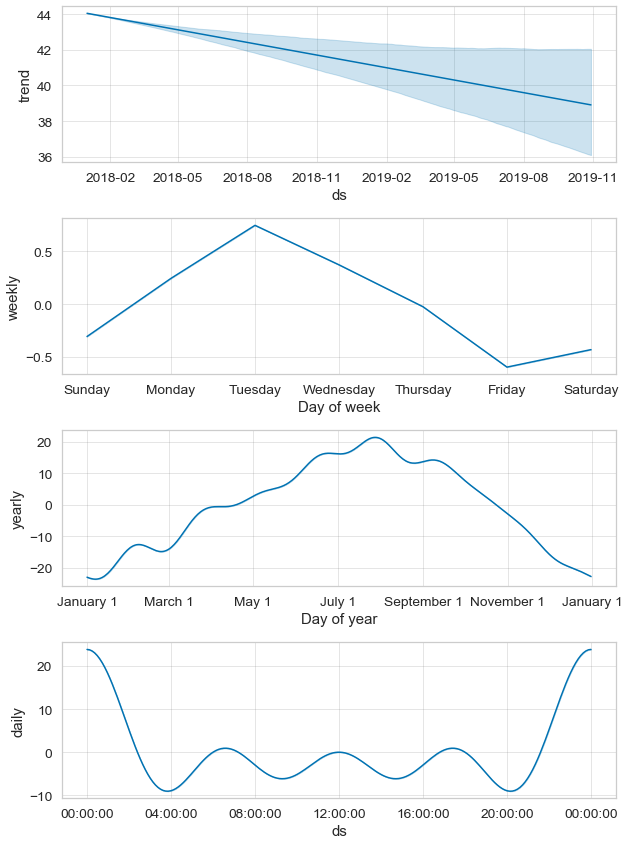

In [475]:
# Plot the components- Self-Split data
fig = model_temp.plot_components(temp_test_fcstb)
plt.tight_layout()

In [476]:
# Making a quick adjustment
plot_test_temp = test_temp.set_index('ds', inplace = True)

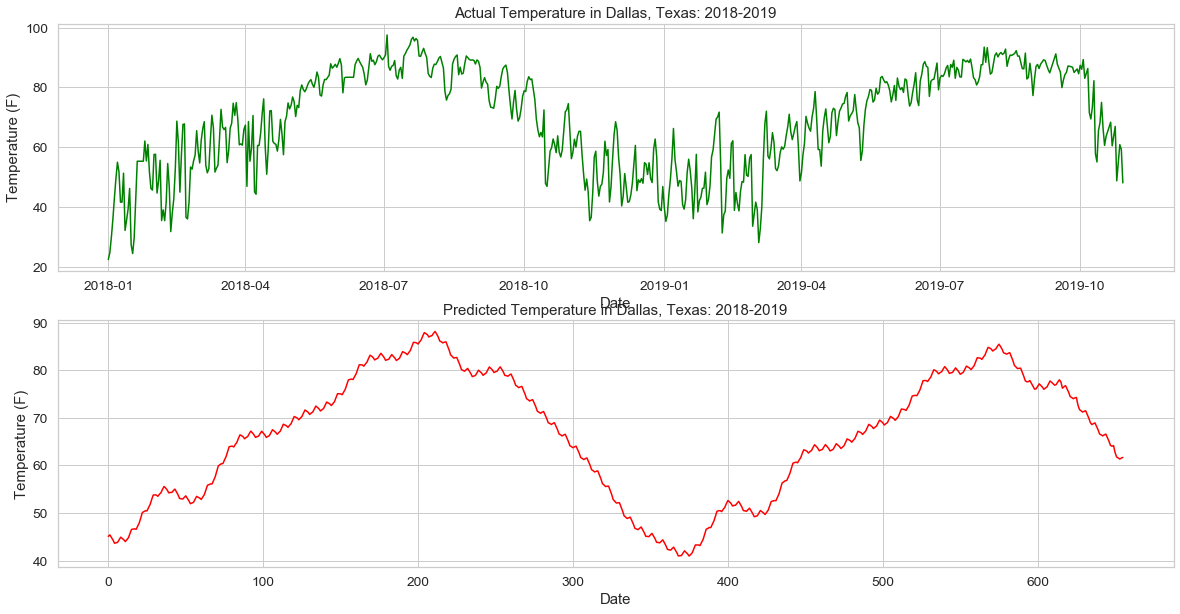

In [477]:
# What does predicted 2018 & 2019 temperature look like vs. actual?
plt.figure(figsize= (20,10))

# Plotting our actual data
plt.subplot(211)
plt.plot(test_temp['y'], color = 'green')
plt.title('Actual Temperature in Dallas, Texas: 2018-2019')
plt.xlabel('Date')
plt.ylabel('Temperature (F)');

# Plotting predicted temps
plt.subplot(212)
plt.plot(temp_test_fcstb['yhat'], color = 'red')
plt.title('Predicted Temperature in Dallas, Texas: 2018-2019')
plt.xlabel('Date')
plt.ylabel('Temperature (F)');


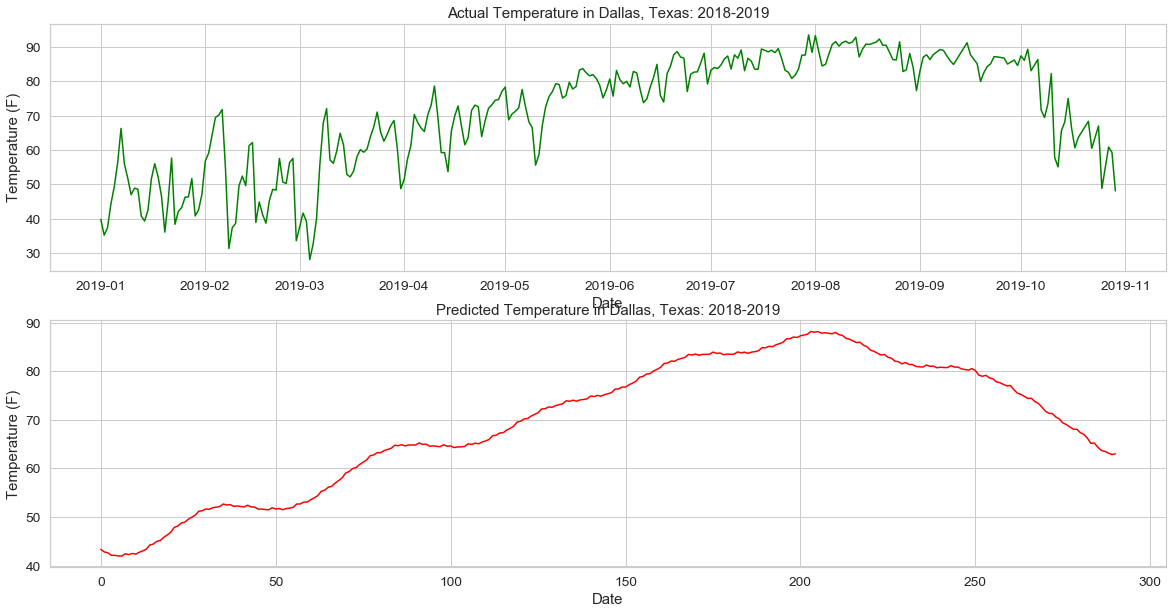

In [478]:
# What does predicted 2019 temperature look like vs. actual?
plt.figure(figsize= (20,10))

# Plotting our actual data
plt.subplot(211)
plt.plot(temp2019['temp_in_F'], color= 'green')
plt.title('Actual Temperature in Dallas, Texas: 2018-2019')
plt.xlabel('Date')
plt.ylabel('Temperature (F)');

# Plotting predicted temps
plt.subplot(212)
plt.plot(temp_test_fcsta['yhat'], color = 'red')
plt.title('Predicted Temperature in Dallas, Texas: 2018-2019')
plt.xlabel('Date')
plt.ylabel('Temperature (F)');


In [479]:
# Test statistics, yo!
mse_temp_b = mean_squared_error(y_true= test_temp['y'],y_pred= temp_test_fcstb['yhat'])
mae_temp_b = mean_absolute_error(y_true= test_temp['y'],y_pred= temp_test_fcstb['yhat'])

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_temp_b = mean_absolute_percentage_error(y_true= test_temp['y'],y_pred= temp_test_fcstb['yhat'])

In [480]:
# Test statistics go here

print('Test Statistics Temperature A:')
print('The mean squared error is: ', mse_temp_a)
print('The mean absolute error is: ', mae_temp_a)
print('The mean absolute percentage error is :', mape_temp_a)

print('\n')
print('Test Statistics Temperature B:')
print('The mean squared error is: ', mse_temp_b)
print('The mean absolute error is: ', mae_temp_b)
print('The mean absolute percentage error is :', mape_temp_b)

Test Statistics Temperature A:
The mean squared error is:  56.787589766994806
The mean absolute error is:  5.869535678982928
The mean absolute percentage error is : 9.702686359896587


Test Statistics Temperature B:
The mean squared error is:  73.82345311987564
The mean absolute error is:  7.1209167448680875
The mean absolute percentage error is : 11.70282262412885


Just as we saw with our crime predictions our error scores are lower when we use our original dataset and our additional data as a testing set. We will keep that model going forward!

### 4.4: Comparing Our Models and Actual Data 
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Unlike other Auto-regressive models used in time series analysis , Prophet boasts the ability to add regressors, thus making it able to preform multivariate analysis on time series data. We will attempt to do just that below!

In [481]:
# Making a model with both features combined (since our original vs. new data was so successfull let's keep that)
m = Prophet(daily_seasonality = True)
m.add_regressor('temp')
m.fit(all_old)

In [482]:
# Making our predictions using our testing set
forecast_all = m.predict(df = all_new)

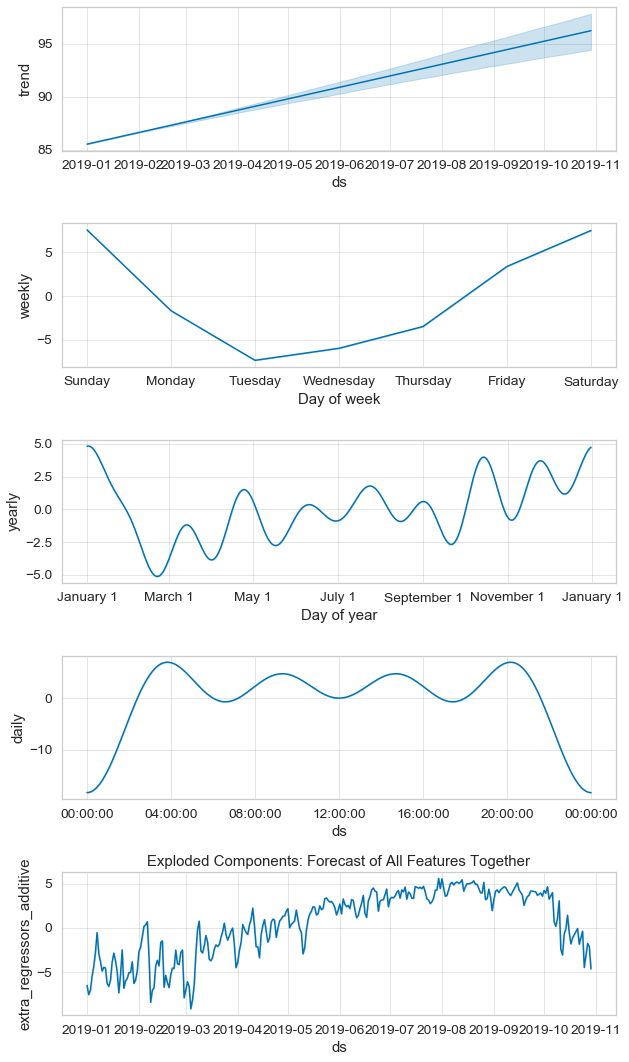

In [483]:
# Plot the components
fig = m.plot_components(forecast_all)
plt.title('Exploded Components: Forecast of All Features Together')
plt.tight_layout()

In [484]:
# Test statistics, yo!
mse_final = mean_squared_error(y_true= all_new['y'],y_pred= forecast_all['yhat'])
mae_final = mean_absolute_error(y_true= all_new['y'],y_pred= forecast_all['yhat'])
mape_final = mean_absolute_percentage_error(y_true= all_new['y'],y_pred= forecast_all['yhat'])

print('Test Statistics :')
print('The mean squared error is: ', mse_final)
print('The mean absolute error is: ', mae_final)
print('The mean absolute percentage error is :', mape_final)

Test Statistics :
The mean squared error is:  225.6226043993055
The mean absolute error is:  12.022216569253338
The mean absolute percentage error is : 20.63725903321737


Overall, our errors aren't too high, which is great! Unfortunately, without combining all data and splitting into testing groups based on our own criteria we aren't able to test this model again with other parameters and we really don't know how well our model preforms based on other models. Prophet has an additional capability to cross-validate models, so let's try that below to see if we can tune our model any further!

In [485]:
# Importing our needed tools
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2017-01-05 00:00:00 and 2017-12-31 00:00:00


ds   yhat  yhat_lower  yhat_upper   y     cutoff
0 2017-01-06  58.66       47.77       70.11  51 2017-01-05
1 2017-01-07  61.85       51.55       73.34  62 2017-01-05
2 2017-01-08  63.38       51.91       75.11  67 2017-01-05
3 2017-01-09  57.84       46.63       68.61  58 2017-01-05
4 2017-01-10  56.53       44.11       67.89  65 2017-01-05

In [486]:
# Let's look at preformance metrics for this 
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon     mse   rmse   mae  mape  coverage
0 37 days  126.75  11.26  8.98  0.17      0.71
1 38 days  127.67  11.30  9.09  0.17      0.69
2 39 days  130.04  11.40  9.24  0.18      0.68
3 40 days  129.93  11.40  9.30  0.18      0.68
4 41 days  129.14  11.36  9.25  0.18      0.68

In [487]:
# What do statistics look like the further out you go in time?
df_p.tail()

horizon     mse   rmse    mae  mape  coverage
324 361 days  296.11  17.21  14.38  0.25      0.40
325 362 days  308.83  17.57  14.78  0.26      0.38
326 363 days  314.34  17.73  14.93  0.26      0.38
327 364 days  321.14  17.92  15.08  0.26      0.38
328 365 days  327.63  18.10  15.20  0.26      0.38

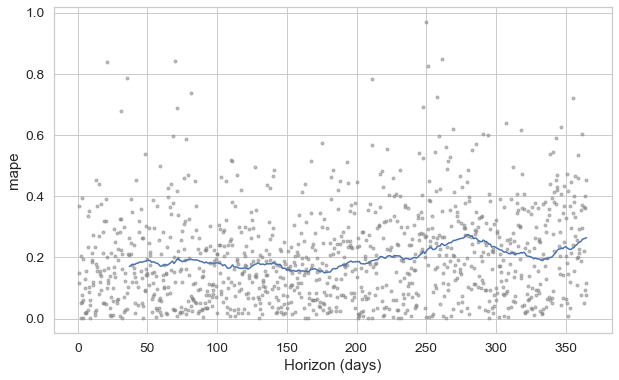

In [488]:
# Let's plot what this all looks like
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

Cross validation in Prophet is, thankfully, pretty much the same as any other cross validation. We use cross validation to help us tune our model and help it make more accurate predictions. In the image above we can see our MAPE for each individual prediction as a dot and the line shows our MAPE for the entire model.  Our main takeaway from our cross validation is: the longer out in time we go for predictions the less accurate our model is. This is why our initial test models with split data were less accurate than our original data vs. brand new data.

## 5. Final Thoughts/Reflection
[Back to Outline](#Project-Outline:-Time-Series-Analysis)

Time series modeling is a mythical creature in world of data science. It is very difficult learn how to deal with this type of data becase very few resources exist that can explain how to manipulate and translate time series data without requiring a masters in statistics and econometrics. In the future I would like to continue to work on this project and refine my models as I learn more about this specialization.

Want to know what I did with this data? Check out the project page [here](https://steelealloy.github.io/final_capstone/)